In [13]:
import os
import numpy as np
import librosa
import tensorflow as tf
from tensorflow.keras import layers, models, Input
from tensorflow.keras.callbacks import Callback
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

In [14]:
# Direktori dataset
INPUT_DIR = 'dataset'

# Direktori tempat menyimpan model
MODEL_DIR = 'model'
# Buat direktori jika belum ada
if not os.path.exists(MODEL_DIR):
    os.makedirs(MODEL_DIR)

In [15]:
# Fungsi untuk load dan ekstrak Mel-spectrogram
def load_and_extract_spectrogram(file_path, n_mels=128, n_fft=2048, hop_length=512, max_time_steps=128):
    y, sr = librosa.load(file_path, sr=None)
    mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)
    mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)
    if mel_spec_db.shape[1] < max_time_steps:
        pad_width = max_time_steps - mel_spec_db.shape[1]
        mel_spec_db = np.pad(mel_spec_db, ((0, 0), (0, pad_width)), mode='constant')
    else:
        mel_spec_db = mel_spec_db[:, :max_time_steps]
    return mel_spec_db

In [16]:
# Loop melalui setiap folder (kelas)
subdirectories = [subdir for subdir in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR, subdir))]


In [17]:
class CustomEarlyStopping(Callback):
    def __init__(self, val_loss_threshold=0.15, val_accuracy_threshold=0.96, patience=3, min_epochs=15):
        super(CustomEarlyStopping, self).__init__()
        self.val_loss_threshold = val_loss_threshold
        self.val_accuracy_threshold = val_accuracy_threshold
        self.patience = patience
        self.min_epochs = min_epochs
        self.best_weights = None
        self.wait = 0
        self.stopped_epoch = 0

    def on_epoch_end(self, epoch, logs=None):
        val_loss = logs.get('val_loss')
        val_accuracy = logs.get('val_accuracy')

        # Check if val_loss is below threshold and val_accuracy is above threshold
        if epoch >= self.min_epochs and val_loss < self.val_loss_threshold and val_accuracy > self.val_accuracy_threshold:
            print(f"\n Stopping training as val_loss ({val_loss:.4f}) is below {self.val_loss_threshold} "
                  f"and val_accuracy ({val_accuracy:.4f}) is above {self.val_accuracy_threshold * 100:.2f}%")
            self.model.stop_training = True
            self.stopped_epoch = epoch
        elif self.model.stop_training:
            self.wait += 1
            if self.wait >= self.patience:
                self.model.stop_training = True
        else:
            self.wait = 0  # Reset patience if improvement is seen

        # Store the best weights if this is the best result so far
        if val_accuracy > self.val_accuracy_threshold and val_loss < self.val_loss_threshold:
            self.best_weights = self.model.get_weights()

    def on_train_end(self, logs=None):
        # Restore the best weights after training ends
        if self.best_weights is not None:
            self.model.set_weights(self.best_weights)
            print("Best weights restored.")
        print(f"Training stopped at epoch {self.stopped_epoch}")

Processing class: 01. alif_fathah
Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 115ms/step - accuracy: 0.5404 - loss: 11.4077 - val_accuracy: 0.4884 - val_loss: 0.7263
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - accuracy: 0.5301 - loss: 0.7257 - val_accuracy: 0.5116 - val_loss: 0.7230
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.5438 - loss: 0.7144 - val_accuracy: 0.4651 - val_loss: 0.6948
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.5021 - loss: 0.6835 - val_accuracy: 0.5349 - val_loss: 0.6827
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.5679 - loss: 0.6766 - val_accuracy: 0.5814 - val_loss: 0.6842
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - accuracy: 0.5766 - loss: 0.6637 - val_accuracy: 0.5116 - val_loss: 0.6913
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.5790 - loss: 0.6611 - val_accuracy: 0.6047 - val_loss: 0.6956
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.6233 - loss: 0.6450 - val_

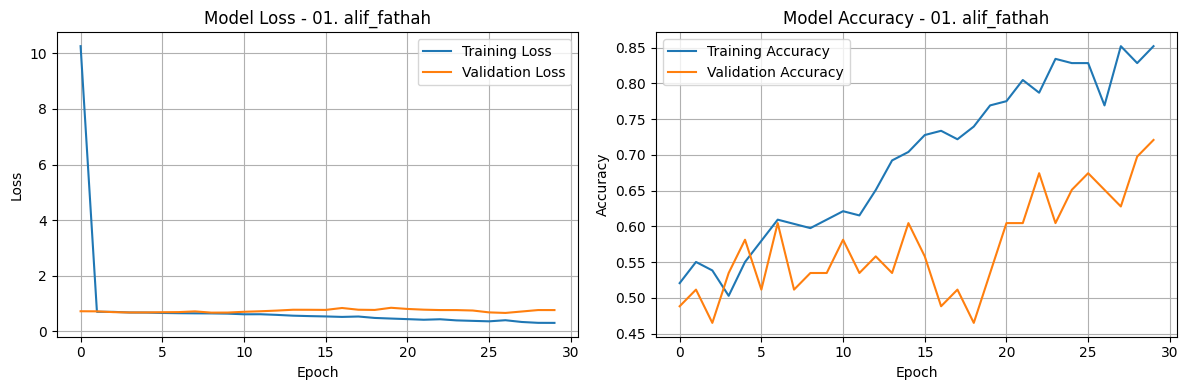

Processing class: 02. alif_kasroh
Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 110ms/step - accuracy: 0.5806 - loss: 4.1756 - val_accuracy: 0.4651 - val_loss: 1.1324
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - accuracy: 0.6076 - loss: 0.7250 - val_accuracy: 0.6047 - val_loss: 0.7298
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.5695 - loss: 0.6405 - val_accuracy: 0.6047 - val_loss: 0.7392
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 0.6364 - loss: 0.6525 - val_accuracy: 0.4651 - val_loss: 0.7052
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.6081 - loss: 0.6366 - val_accuracy: 0.4884 - val_loss: 0.6985
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 0.5897 - loss: 0.6215 - val_accuracy: 0.5814 - val_loss: 0.6807
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.6374 - loss: 0.6330 - val_accuracy: 0.6512 - val_loss: 0.6671
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.6436 - loss: 0.6079 - val_a

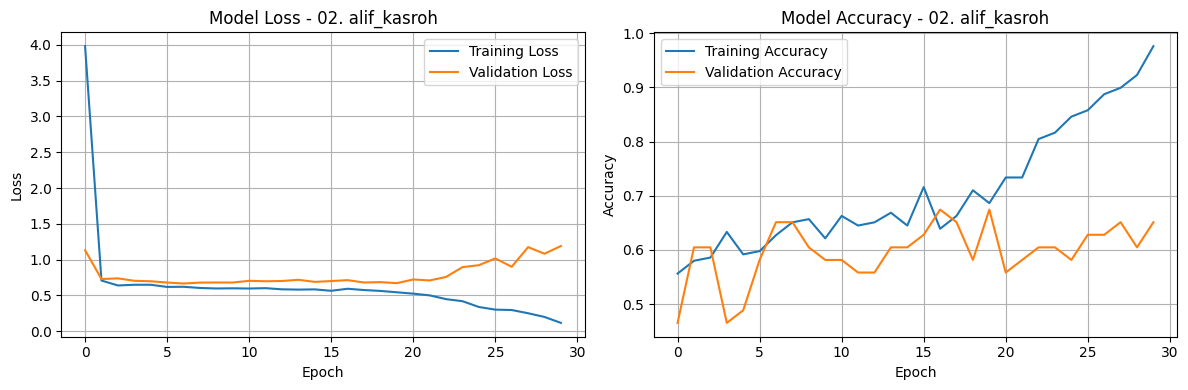

Processing class: 03. alif_dommah
Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 123ms/step - accuracy: 0.5485 - loss: 19.2753 - val_accuracy: 0.5116 - val_loss: 0.9386
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - accuracy: 0.5109 - loss: 0.8279 - val_accuracy: 0.4884 - val_loss: 0.7185
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - accuracy: 0.5422 - loss: 0.6974 - val_accuracy: 0.5116 - val_loss: 0.7025
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.4457 - loss: 0.7203 - val_accuracy: 0.4419 - val_loss: 0.7087
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - accuracy: 0.5072 - loss: 0.6938 - val_accuracy: 0.3953 - val_loss: 0.7192
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.5046 - loss: 0.6950 - val_accuracy: 0.3721 - val_loss: 0.7157
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.5422 - loss: 0.6895 - val_accuracy: 0.4186 - val_loss: 0.7195
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.5039 - loss: 0.6917 - val_

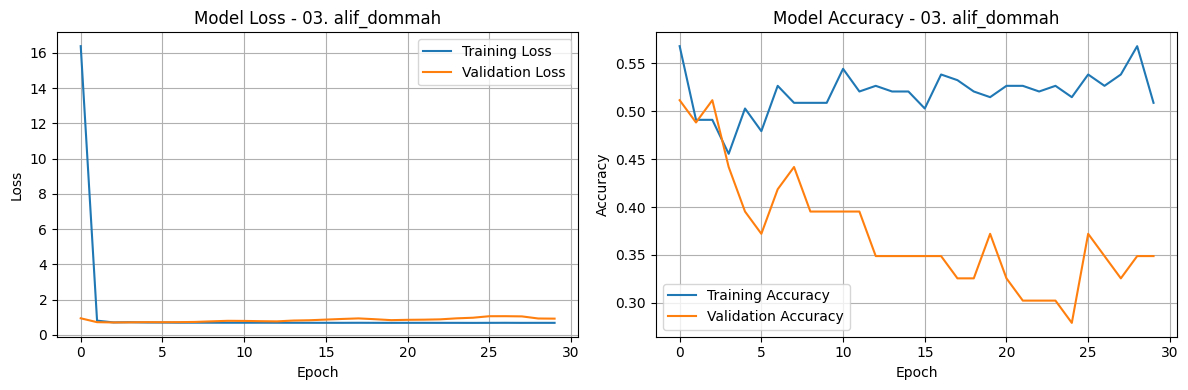

Processing class: 04. ba_fathah
Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 137ms/step - accuracy: 0.5367 - loss: 9.4244 - val_accuracy: 0.5116 - val_loss: 0.7479
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - accuracy: 0.5753 - loss: 0.7044 - val_accuracy: 0.4884 - val_loss: 0.7373
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - accuracy: 0.5610 - loss: 0.6857 - val_accuracy: 0.4884 - val_loss: 0.7382
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - accuracy: 0.5065 - loss: 0.6989 - val_accuracy: 0.4884 - val_loss: 0.7293
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 0.6424 - loss: 0.6345 - val_accuracy: 0.4186 - val_loss: 0.7155
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.6471 - loss: 0.6244 - val_accuracy: 0.6279 - val_loss: 0.7175
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - accuracy: 0.6150 - loss: 0.6794 - val_accuracy: 0.5581 - val_loss: 0.6834
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 0.6425 - loss: 0.6224 - val_ac

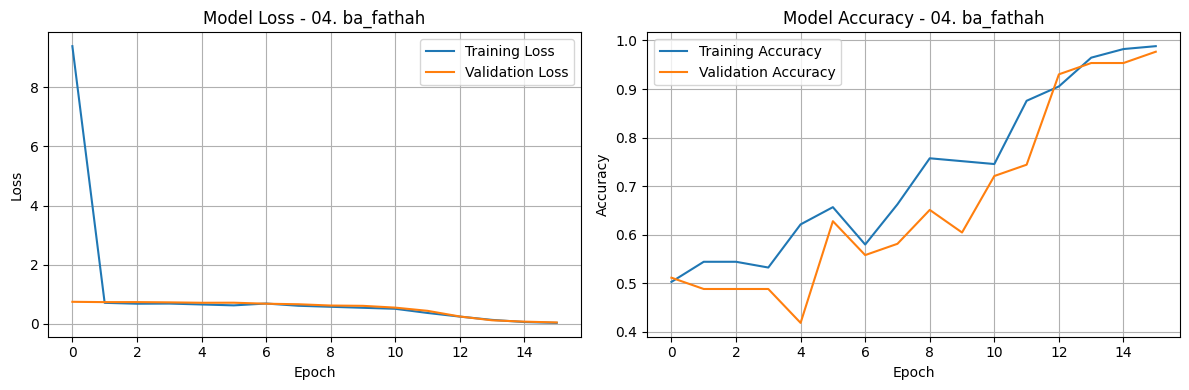

Processing class: 05. ba_kasroh
Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 128ms/step - accuracy: 0.5100 - loss: 5.1339 - val_accuracy: 0.5349 - val_loss: 0.8688
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.5355 - loss: 0.7558 - val_accuracy: 0.5116 - val_loss: 0.7604
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - accuracy: 0.6085 - loss: 0.6410 - val_accuracy: 0.4651 - val_loss: 0.7525
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.5464 - loss: 0.6609 - val_accuracy: 0.4419 - val_loss: 0.7567
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 0.5881 - loss: 0.6348 - val_accuracy: 0.5349 - val_loss: 0.7350
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - accuracy: 0.6367 - loss: 0.6261 - val_accuracy: 0.4651 - val_loss: 0.7627
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - accuracy: 0.5940 - loss: 0.6110 - val_accuracy: 0.5349 - val_loss: 0.7198
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.6371 - loss: 0.5917 - val_ac

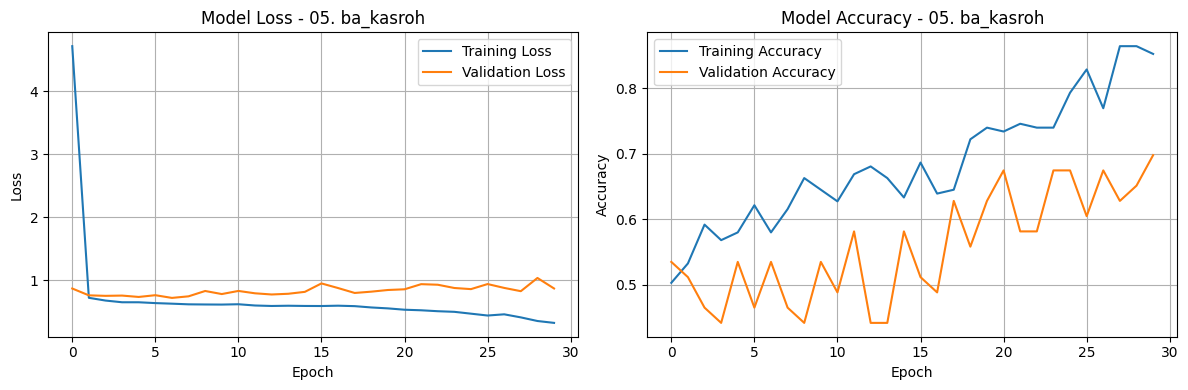

Processing class: 06. ba_dommah
Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 128ms/step - accuracy: 0.4493 - loss: 9.2312 - val_accuracy: 0.4884 - val_loss: 0.8485
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.5429 - loss: 0.7009 - val_accuracy: 0.4651 - val_loss: 0.7349
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - accuracy: 0.4925 - loss: 0.7074 - val_accuracy: 0.5349 - val_loss: 0.7146
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - accuracy: 0.5545 - loss: 0.6884 - val_accuracy: 0.5814 - val_loss: 0.6767
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - accuracy: 0.6137 - loss: 0.6442 - val_accuracy: 0.6279 - val_loss: 0.6715
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.6674 - loss: 0.6476 - val_accuracy: 0.5581 - val_loss: 0.6538
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.6452 - loss: 0.6122 - val_accuracy: 0.6744 - val_loss: 0.6393
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.7062 - loss: 0.5894 - val_ac

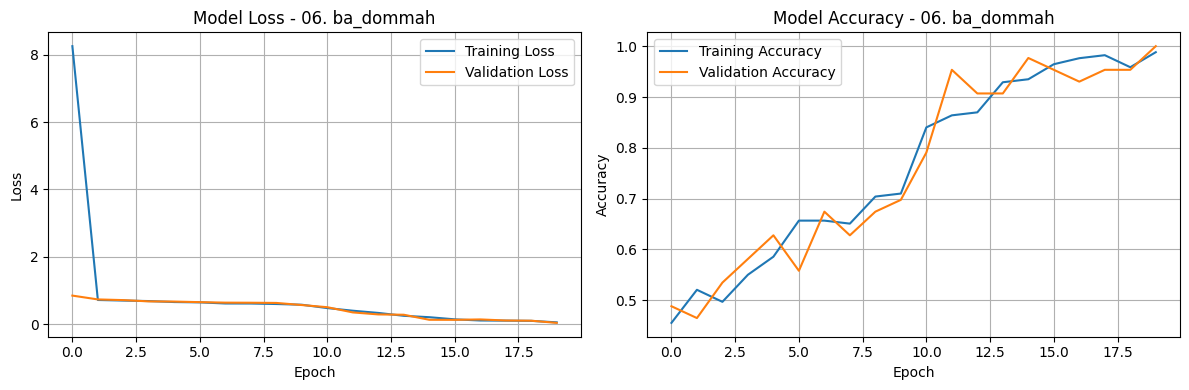

Processing class: 07. ta_fathah
Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 117ms/step - accuracy: 0.4951 - loss: 9.3662 - val_accuracy: 0.5116 - val_loss: 1.2010
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step - accuracy: 0.5021 - loss: 0.9794 - val_accuracy: 0.5349 - val_loss: 0.7982
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - accuracy: 0.5578 - loss: 0.6964 - val_accuracy: 0.4884 - val_loss: 0.7547
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - accuracy: 0.5839 - loss: 0.7005 - val_accuracy: 0.4884 - val_loss: 0.6861
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - accuracy: 0.6578 - loss: 0.6340 - val_accuracy: 0.5581 - val_loss: 0.6985
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - accuracy: 0.6420 - loss: 0.6195 - val_accuracy: 0.5581 - val_loss: 0.7016
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.6150 - loss: 0.6285 - val_accuracy: 0.5349 - val_loss: 0.7101
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.6242 - loss: 0.6519 - val_a

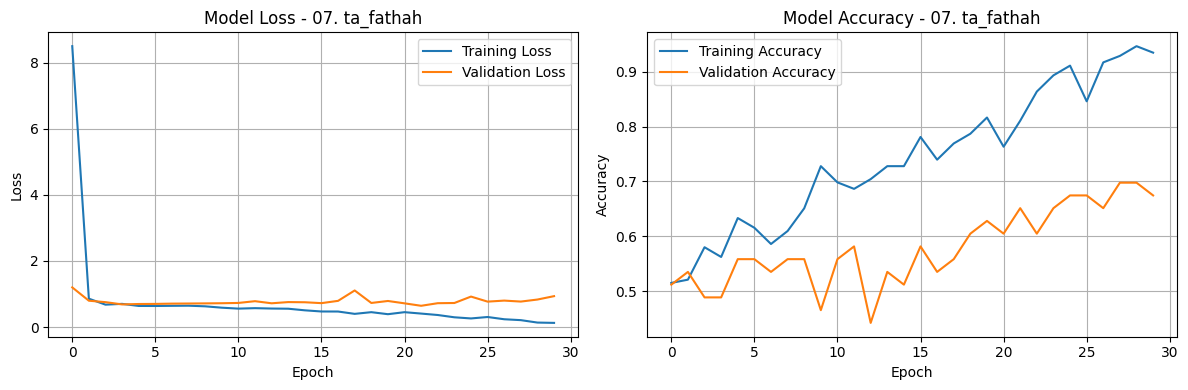

Processing class: 08. ta_kasroh
Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 110ms/step - accuracy: 0.5248 - loss: 9.5822 - val_accuracy: 0.5349 - val_loss: 1.6651
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - accuracy: 0.5865 - loss: 0.9881 - val_accuracy: 0.5116 - val_loss: 0.6812
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.6090 - loss: 0.6384 - val_accuracy: 0.5814 - val_loss: 0.6891
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - accuracy: 0.6134 - loss: 0.6374 - val_accuracy: 0.4884 - val_loss: 0.7209
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.6338 - loss: 0.6129 - val_accuracy: 0.4884 - val_loss: 0.8010
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 0.6358 - loss: 0.6195 - val_accuracy: 0.4884 - val_loss: 0.7572
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - accuracy: 0.6789 - loss: 0.5745 - val_accuracy: 0.4884 - val_loss: 0.8367
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.6631 - loss: 0.6333 - val_a

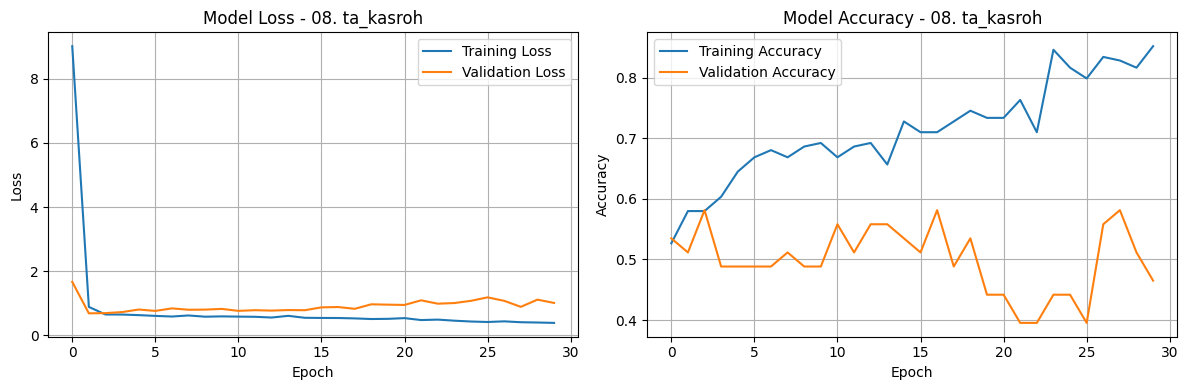

Processing class: 09. ta_dommah
Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 127ms/step - accuracy: 0.4848 - loss: 7.1654 - val_accuracy: 0.4884 - val_loss: 0.7055
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.5218 - loss: 0.6912 - val_accuracy: 0.6512 - val_loss: 0.6658
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - accuracy: 0.5444 - loss: 0.6808 - val_accuracy: 0.6512 - val_loss: 0.6453
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - accuracy: 0.5707 - loss: 0.6791 - val_accuracy: 0.6047 - val_loss: 0.6424
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - accuracy: 0.6333 - loss: 0.6547 - val_accuracy: 0.6279 - val_loss: 0.6460
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - accuracy: 0.5975 - loss: 0.6604 - val_accuracy: 0.6047 - val_loss: 0.6513
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.6014 - loss: 0.6484 - val_accuracy: 0.6279 - val_loss: 0.6297
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - accuracy: 0.6475 - loss: 0.6376 - val_ac

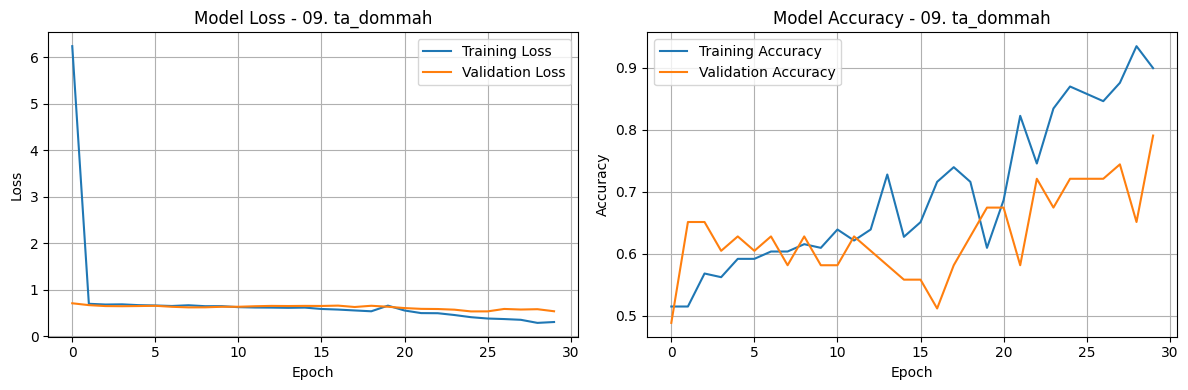

Processing class: 10. tsa_fathah
Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 113ms/step - accuracy: 0.4767 - loss: 8.4609 - val_accuracy: 0.4884 - val_loss: 0.8682
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 0.4569 - loss: 0.7653 - val_accuracy: 0.5581 - val_loss: 0.7083
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.6334 - loss: 0.6688 - val_accuracy: 0.5116 - val_loss: 0.7297
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - accuracy: 0.5896 - loss: 0.6612 - val_accuracy: 0.5581 - val_loss: 0.7718
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 0.6545 - loss: 0.6075 - val_accuracy: 0.6047 - val_loss: 0.7254
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - accuracy: 0.7136 - loss: 0.5711 - val_accuracy: 0.6047 - val_loss: 0.8385
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.6680 - loss: 0.5901 - val_accuracy: 0.5814 - val_loss: 0.6810
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 0.6652 - loss: 0.5945 - val_ac

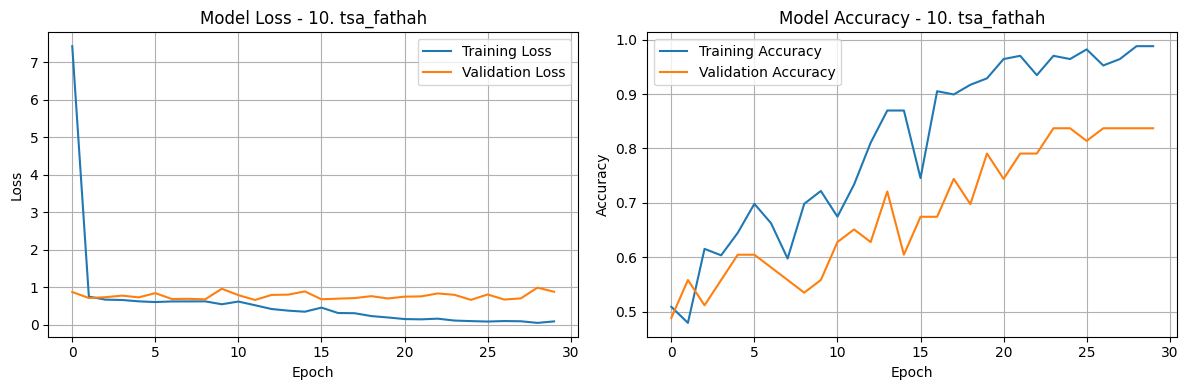

Processing class: 11. tsa_kasroh
Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 119ms/step - accuracy: 0.5240 - loss: 10.1324 - val_accuracy: 0.5814 - val_loss: 1.0735
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.5665 - loss: 0.8562 - val_accuracy: 0.5349 - val_loss: 0.7560
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - accuracy: 0.5862 - loss: 0.6980 - val_accuracy: 0.5581 - val_loss: 0.6832
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.6564 - loss: 0.6353 - val_accuracy: 0.5814 - val_loss: 0.7116
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.6283 - loss: 0.6418 - val_accuracy: 0.6279 - val_loss: 0.6888
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - accuracy: 0.6835 - loss: 0.6161 - val_accuracy: 0.5814 - val_loss: 0.6819
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.6683 - loss: 0.6280 - val_accuracy: 0.6279 - val_loss: 0.6665
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - accuracy: 0.6406 - loss: 0.6150 - val_

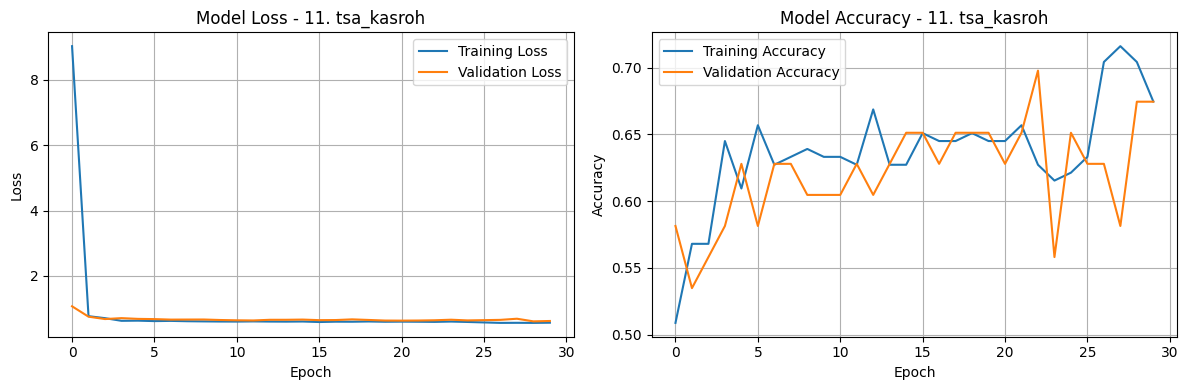

Processing class: 12. tsa_dommah
Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step - accuracy: 0.4687 - loss: 18.9781 - val_accuracy: 0.4884 - val_loss: 0.7086
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - accuracy: 0.5246 - loss: 0.6878 - val_accuracy: 0.4884 - val_loss: 0.6951
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step - accuracy: 0.5944 - loss: 0.6821 - val_accuracy: 0.5581 - val_loss: 0.6767
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - accuracy: 0.5852 - loss: 0.6736 - val_accuracy: 0.5581 - val_loss: 0.6710
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 0.6020 - loss: 0.6656 - val_accuracy: 0.5349 - val_loss: 0.6820
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - accuracy: 0.5459 - loss: 0.6865 - val_accuracy: 0.5581 - val_loss: 0.6646
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - accuracy: 0.5825 - loss: 0.6509 - val_accuracy: 0.5349 - val_loss: 0.6593
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - accuracy: 0.5867 - loss: 0.6626 - val

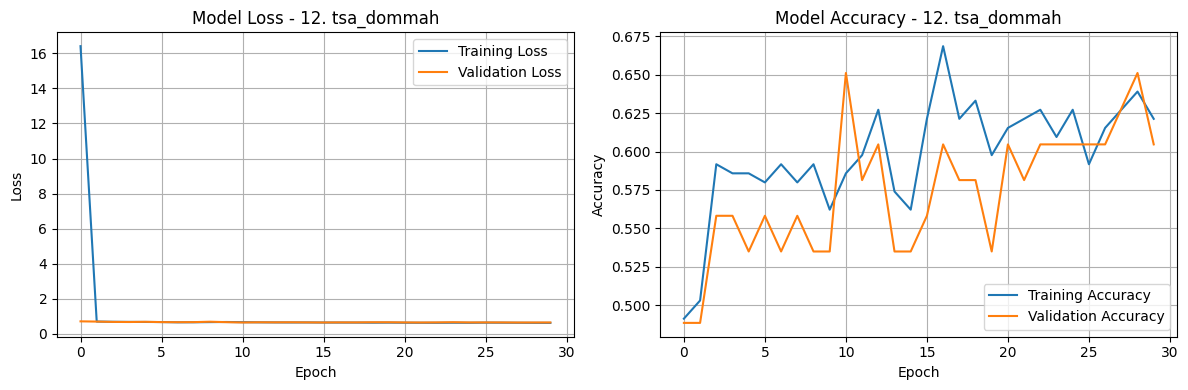

Processing class: 13. jim_fathah
Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 131ms/step - accuracy: 0.4929 - loss: 9.0615 - val_accuracy: 0.5349 - val_loss: 0.7462
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 0.5280 - loss: 0.7296 - val_accuracy: 0.4651 - val_loss: 0.7103
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - accuracy: 0.5856 - loss: 0.6678 - val_accuracy: 0.4651 - val_loss: 0.7517
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.6423 - loss: 0.6410 - val_accuracy: 0.5581 - val_loss: 0.7826
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - accuracy: 0.6996 - loss: 0.5825 - val_accuracy: 0.4186 - val_loss: 0.7222
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - accuracy: 0.6899 - loss: 0.5535 - val_accuracy: 0.5116 - val_loss: 0.8940
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.7579 - loss: 0.4847 - val_accuracy: 0.6047 - val_loss: 0.5706
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.8628 - loss: 0.3823 - val_a

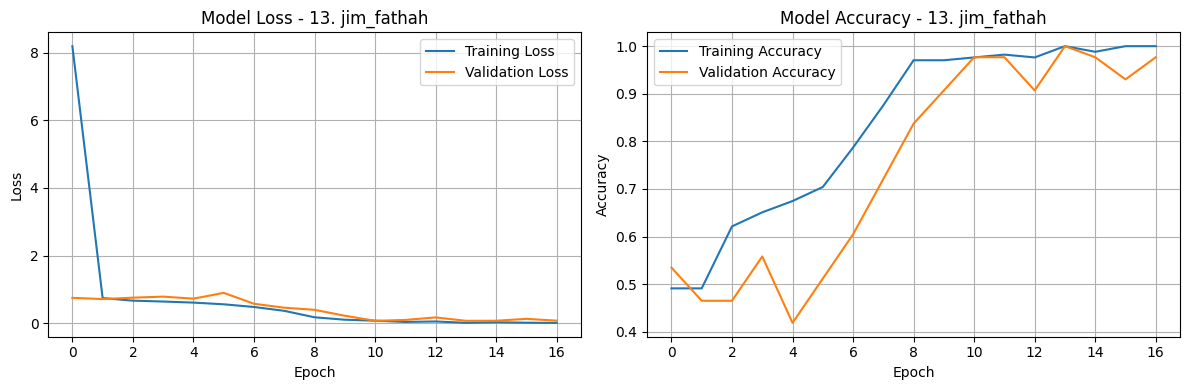

Processing class: 14. jim_kasroh
Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 126ms/step - accuracy: 0.5599 - loss: 5.4097 - val_accuracy: 0.5349 - val_loss: 0.6927
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - accuracy: 0.5472 - loss: 0.6921 - val_accuracy: 0.5349 - val_loss: 0.8224
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - accuracy: 0.6513 - loss: 0.6699 - val_accuracy: 0.4884 - val_loss: 0.6856
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.6623 - loss: 0.6161 - val_accuracy: 0.4884 - val_loss: 0.6916
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.6936 - loss: 0.5896 - val_accuracy: 0.5581 - val_loss: 0.7092
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - accuracy: 0.6023 - loss: 0.6310 - val_accuracy: 0.5581 - val_loss: 0.6918
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.6580 - loss: 0.5868 - val_accuracy: 0.4884 - val_loss: 0.7397
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.6683 - loss: 0.5969 - val_ac

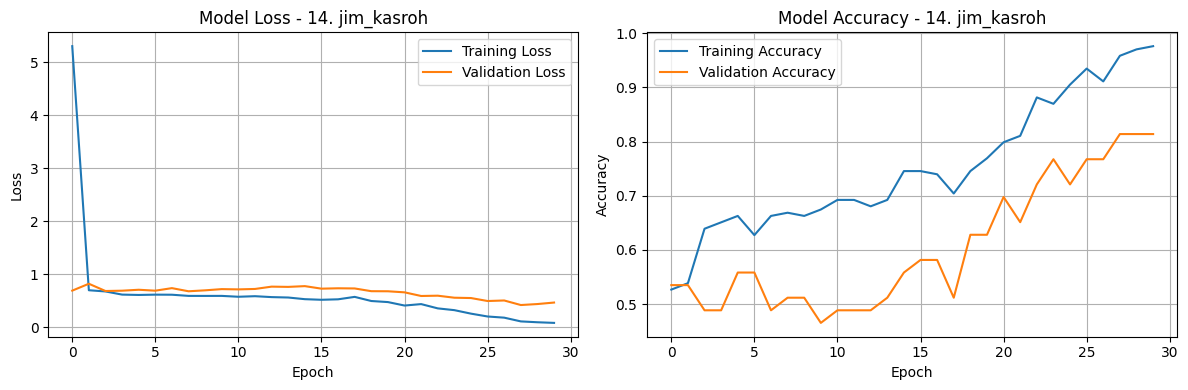

Processing class: 15. jim_dommah
Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 122ms/step - accuracy: 0.4825 - loss: 10.9141 - val_accuracy: 0.4884 - val_loss: 0.8961
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.4780 - loss: 0.8297 - val_accuracy: 0.4884 - val_loss: 0.8300
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - accuracy: 0.5735 - loss: 0.7352 - val_accuracy: 0.6047 - val_loss: 0.7230
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 0.6576 - loss: 0.6341 - val_accuracy: 0.5814 - val_loss: 0.7509
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 0.6269 - loss: 0.6278 - val_accuracy: 0.5581 - val_loss: 0.7642
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - accuracy: 0.7184 - loss: 0.6030 - val_accuracy: 0.5349 - val_loss: 0.7745
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - accuracy: 0.7219 - loss: 0.5913 - val_accuracy: 0.6279 - val_loss: 0.7957
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - accuracy: 0.6513 - loss: 0.6043 - val_a

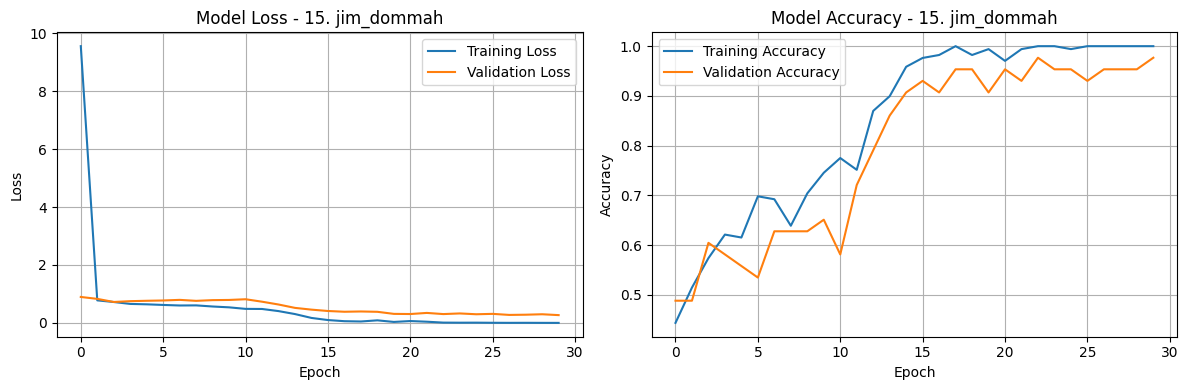

Processing class: 16. hah_fathah
Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 111ms/step - accuracy: 0.4481 - loss: 5.8775 - val_accuracy: 0.4651 - val_loss: 1.3674
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - accuracy: 0.4698 - loss: 1.0790 - val_accuracy: 0.5581 - val_loss: 0.6757
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - accuracy: 0.5550 - loss: 0.6694 - val_accuracy: 0.5349 - val_loss: 0.6782
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - accuracy: 0.5672 - loss: 0.6456 - val_accuracy: 0.5581 - val_loss: 0.6990
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 0.6234 - loss: 0.6261 - val_accuracy: 0.6047 - val_loss: 0.6993
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - accuracy: 0.6508 - loss: 0.6271 - val_accuracy: 0.5581 - val_loss: 0.7038
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - accuracy: 0.6329 - loss: 0.5975 - val_accuracy: 0.6279 - val_loss: 0.6814
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - accuracy: 0.6485 - loss: 0.5837 - val_a

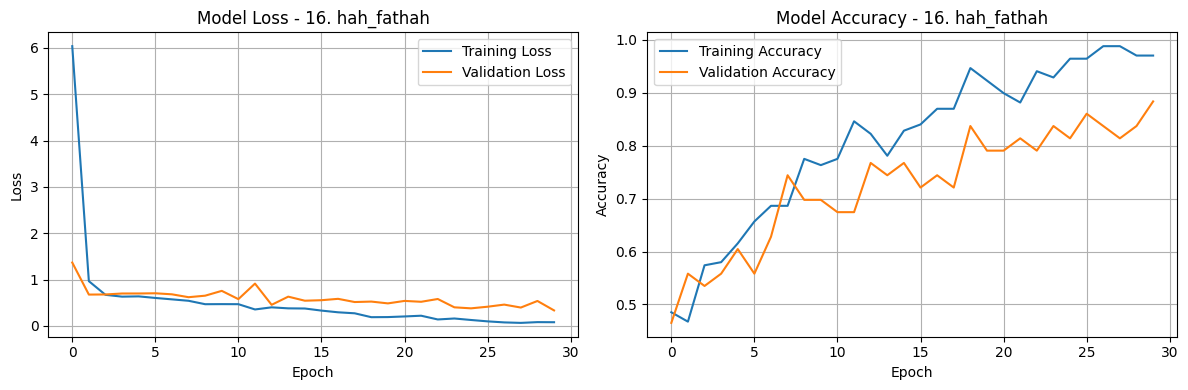

Processing class: 17. hah_kasroh
Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 125ms/step - accuracy: 0.5556 - loss: 4.4847 - val_accuracy: 0.4884 - val_loss: 0.8960
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.5652 - loss: 0.7875 - val_accuracy: 0.5814 - val_loss: 0.6969
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 0.6829 - loss: 0.6023 - val_accuracy: 0.5581 - val_loss: 0.7508
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - accuracy: 0.6778 - loss: 0.5766 - val_accuracy: 0.6279 - val_loss: 0.7106
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - accuracy: 0.6756 - loss: 0.5739 - val_accuracy: 0.5581 - val_loss: 0.7345
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - accuracy: 0.7740 - loss: 0.5094 - val_accuracy: 0.6047 - val_loss: 0.8312
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - accuracy: 0.7277 - loss: 0.5108 - val_accuracy: 0.5116 - val_loss: 0.7430
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - accuracy: 0.7939 - loss: 0.4377 - val_ac

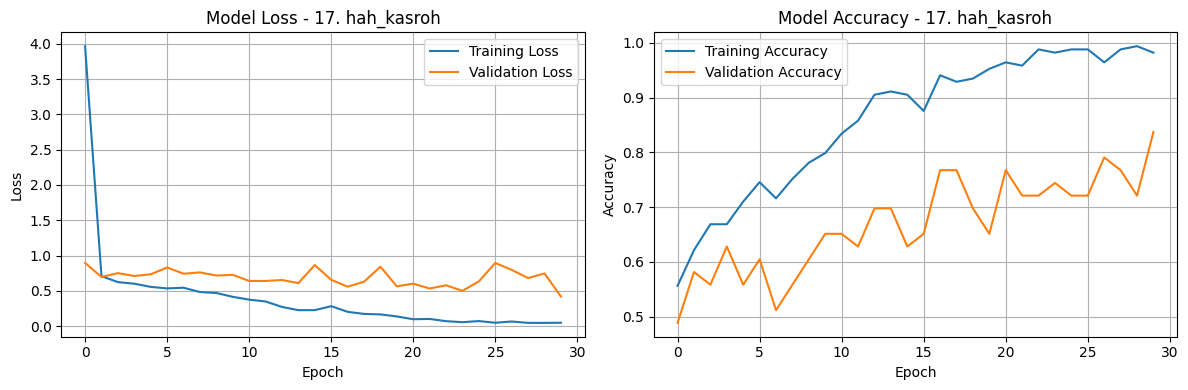

Processing class: 18. hah_dommah
Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 124ms/step - accuracy: 0.5170 - loss: 3.8658 - val_accuracy: 0.5349 - val_loss: 0.6866
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - accuracy: 0.5819 - loss: 0.6705 - val_accuracy: 0.6279 - val_loss: 0.6866
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - accuracy: 0.6268 - loss: 0.6415 - val_accuracy: 0.5116 - val_loss: 0.7269
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - accuracy: 0.5870 - loss: 0.6796 - val_accuracy: 0.5581 - val_loss: 0.6778
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - accuracy: 0.6911 - loss: 0.6071 - val_accuracy: 0.6047 - val_loss: 0.6791
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - accuracy: 0.7059 - loss: 0.5975 - val_accuracy: 0.5349 - val_loss: 0.7017
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - accuracy: 0.6762 - loss: 0.5686 - val_accuracy: 0.6279 - val_loss: 0.7000
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - accuracy: 0.7533 - loss: 0.5288 - val_a

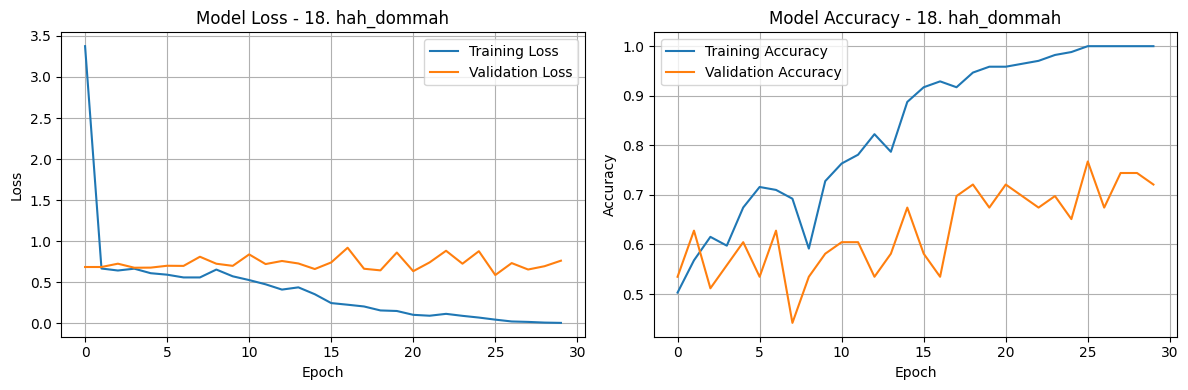

Processing class: 19. kha_fathah
Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 108ms/step - accuracy: 0.5538 - loss: 4.5986 - val_accuracy: 0.4884 - val_loss: 0.8786
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step - accuracy: 0.4557 - loss: 0.7794 - val_accuracy: 0.4884 - val_loss: 0.7580
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - accuracy: 0.5506 - loss: 0.7239 - val_accuracy: 0.4884 - val_loss: 0.6909
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - accuracy: 0.4763 - loss: 0.6922 - val_accuracy: 0.4884 - val_loss: 0.6915
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - accuracy: 0.6004 - loss: 0.6870 - val_accuracy: 0.5116 - val_loss: 0.7269
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - accuracy: 0.6096 - loss: 0.6702 - val_accuracy: 0.5349 - val_loss: 0.7075
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - accuracy: 0.7058 - loss: 0.6707 - val_accuracy: 0.4884 - val_loss: 0.7086
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 127ms/step - accuracy: 0.5991 - loss: 0.6656 - va

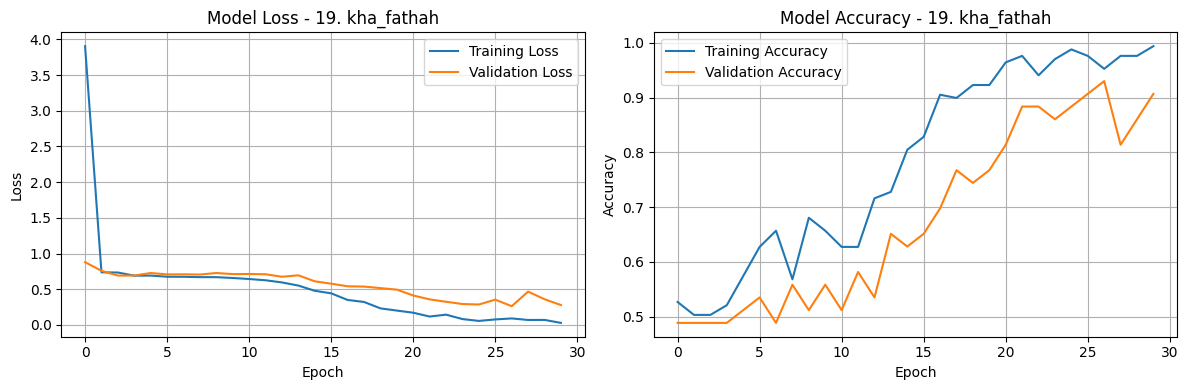

Processing class: 20. kha_kasroh
Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 119ms/step - accuracy: 0.5042 - loss: 8.3295 - val_accuracy: 0.5349 - val_loss: 1.8658
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 115ms/step - accuracy: 0.5399 - loss: 1.5199 - val_accuracy: 0.5349 - val_loss: 0.7016
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.5946 - loss: 0.6534 - val_accuracy: 0.5349 - val_loss: 0.7861
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.7046 - loss: 0.6003 - val_accuracy: 0.5349 - val_loss: 0.9160
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 0.6665 - loss: 0.5710 - val_accuracy: 0.4884 - val_loss: 0.9100
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 0.7039 - loss: 0.6031 - val_accuracy: 0.5116 - val_loss: 0.8690
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - accuracy: 0.6800 - loss: 0.5779 - val_accuracy: 0.5349 - val_loss: 0.9067
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - accuracy: 0.7207 - loss: 0.5168 - val_a

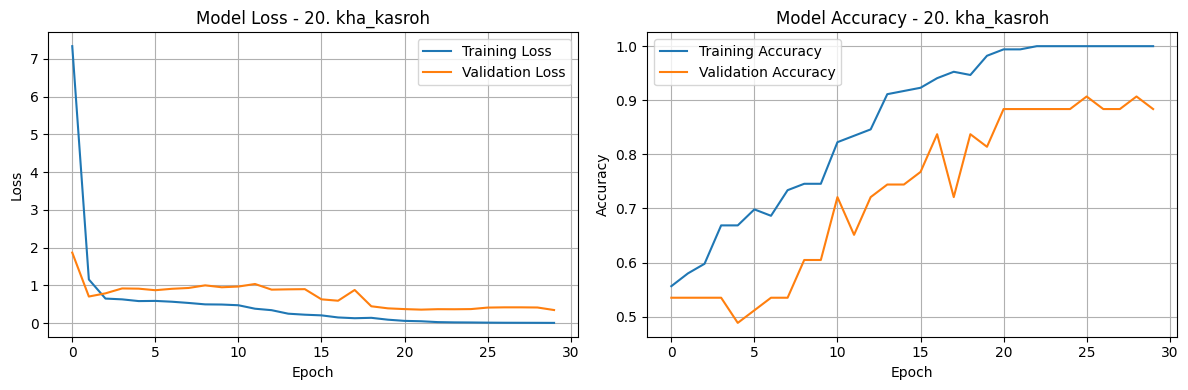

Processing class: 21. kha_dommah
Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 123ms/step - accuracy: 0.4583 - loss: 9.4296 - val_accuracy: 0.5814 - val_loss: 0.8805
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - accuracy: 0.6307 - loss: 0.7411 - val_accuracy: 0.5116 - val_loss: 0.6983
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - accuracy: 0.6522 - loss: 0.6333 - val_accuracy: 0.5581 - val_loss: 0.6767
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - accuracy: 0.6257 - loss: 0.6560 - val_accuracy: 0.5349 - val_loss: 0.6938
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - accuracy: 0.6806 - loss: 0.6123 - val_accuracy: 0.6047 - val_loss: 0.6933
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - accuracy: 0.7231 - loss: 0.5629 - val_accuracy: 0.5814 - val_loss: 0.7047
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - accuracy: 0.6711 - loss: 0.5664 - val_accuracy: 0.6047 - val_loss: 0.7240
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - accuracy: 0.6997 - loss: 0.5477 - val_a

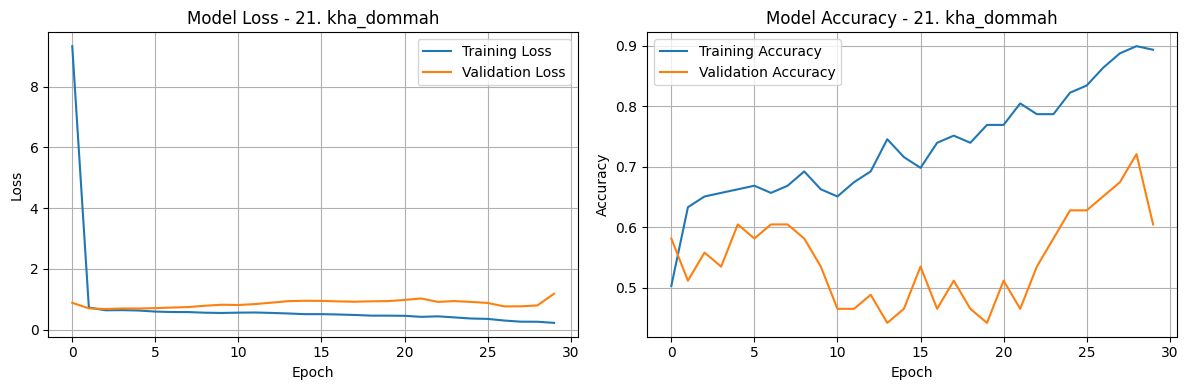

Processing class: 22. dal_fathah
Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 112ms/step - accuracy: 0.4493 - loss: 9.5330 - val_accuracy: 0.5349 - val_loss: 0.9112
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - accuracy: 0.5392 - loss: 0.8486 - val_accuracy: 0.6047 - val_loss: 0.6743
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - accuracy: 0.5550 - loss: 0.6639 - val_accuracy: 0.5349 - val_loss: 0.7170
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.6421 - loss: 0.6383 - val_accuracy: 0.4884 - val_loss: 0.7256
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - accuracy: 0.6093 - loss: 0.6155 - val_accuracy: 0.4884 - val_loss: 0.7092
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.6892 - loss: 0.5750 - val_accuracy: 0.6279 - val_loss: 0.6471
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 0.7657 - loss: 0.5179 - val_accuracy: 0.6512 - val_loss: 0.6897
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 0.8025 - loss: 0.4304 - val_ac

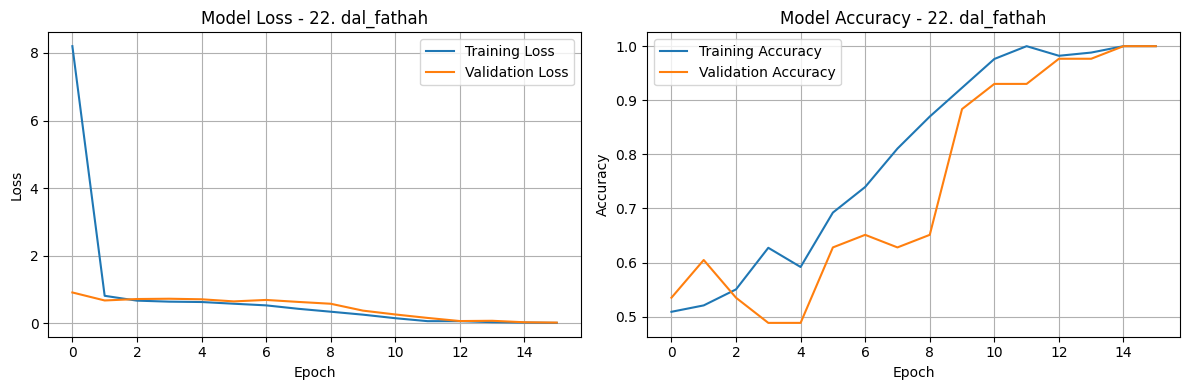

Processing class: 23. dal_kasroh
Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 125ms/step - accuracy: 0.5677 - loss: 5.0179 - val_accuracy: 0.5116 - val_loss: 0.9460
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - accuracy: 0.4983 - loss: 0.9695 - val_accuracy: 0.5814 - val_loss: 0.7271
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - accuracy: 0.7050 - loss: 0.5484 - val_accuracy: 0.6279 - val_loss: 0.8961
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.7387 - loss: 0.5521 - val_accuracy: 0.5581 - val_loss: 0.8265
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - accuracy: 0.7159 - loss: 0.5547 - val_accuracy: 0.5581 - val_loss: 0.8948
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.6868 - loss: 0.5372 - val_accuracy: 0.6047 - val_loss: 0.8366
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.7172 - loss: 0.5268 - val_accuracy: 0.6279 - val_loss: 0.9300
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 0.6996 - loss: 0.5012 - val_a

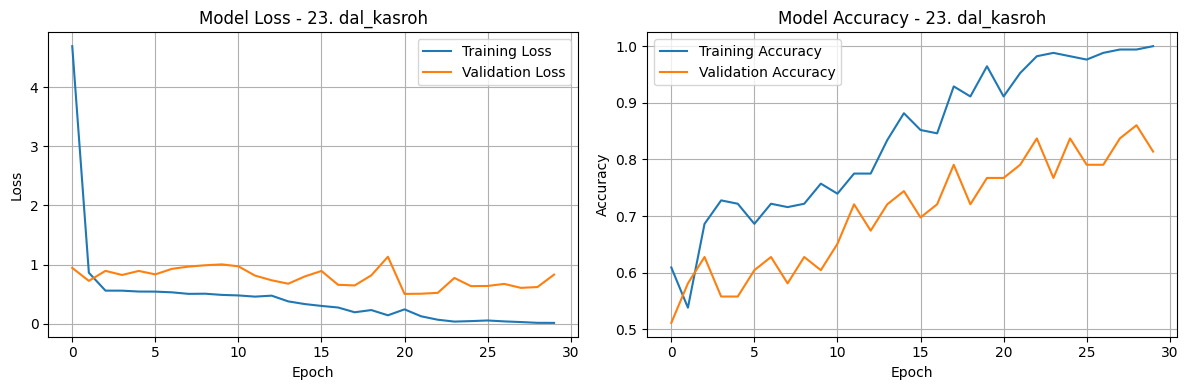

Processing class: 24. dal_dommah
Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 115ms/step - accuracy: 0.5321 - loss: 4.6830 - val_accuracy: 0.4884 - val_loss: 1.0459
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step - accuracy: 0.5452 - loss: 0.7198 - val_accuracy: 0.5349 - val_loss: 0.9089
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step - accuracy: 0.6473 - loss: 0.6671 - val_accuracy: 0.6512 - val_loss: 0.7504
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.7197 - loss: 0.5750 - val_accuracy: 0.6744 - val_loss: 0.7117
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 0.6670 - loss: 0.5831 - val_accuracy: 0.6047 - val_loss: 0.6988
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - accuracy: 0.7281 - loss: 0.5301 - val_accuracy: 0.6977 - val_loss: 0.6658
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.7798 - loss: 0.4423 - val_accuracy: 0.7442 - val_loss: 0.6108
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.8481 - loss: 0.3752 - val_

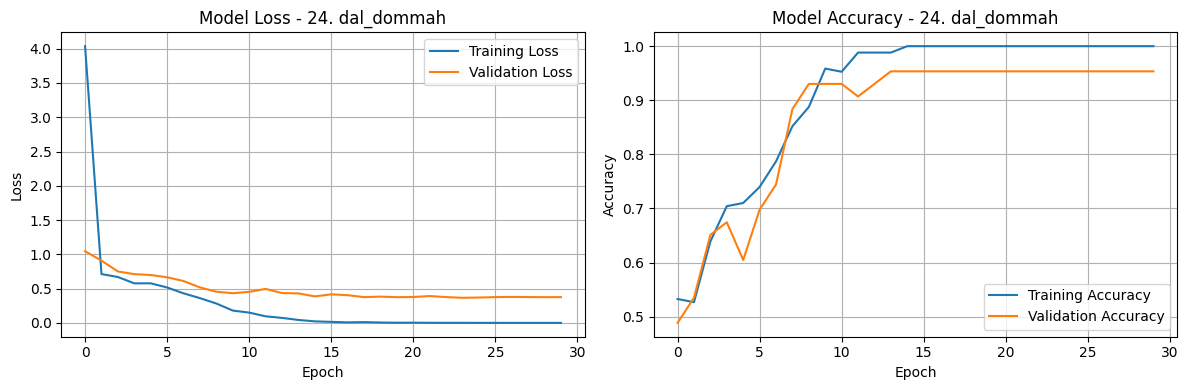

Processing class: 25. dzal_fathah
Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 115ms/step - accuracy: 0.5516 - loss: 3.7438 - val_accuracy: 0.4651 - val_loss: 0.8859
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step - accuracy: 0.5543 - loss: 0.6839 - val_accuracy: 0.5116 - val_loss: 0.7679
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 0.6074 - loss: 0.6814 - val_accuracy: 0.6279 - val_loss: 0.6645
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.7231 - loss: 0.6146 - val_accuracy: 0.5349 - val_loss: 0.6933
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.7011 - loss: 0.5707 - val_accuracy: 0.5349 - val_loss: 0.6961
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.7064 - loss: 0.5749 - val_accuracy: 0.6047 - val_loss: 0.6255
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.8079 - loss: 0.4897 - val_accuracy: 0.6744 - val_loss: 0.5300
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - accuracy: 0.8550 - loss: 0.3785 - val_

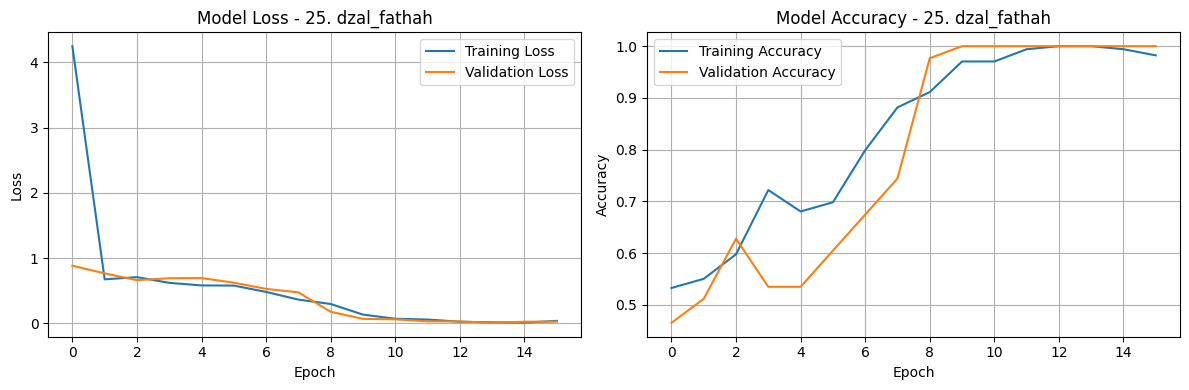

Processing class: 26. dzal_kasroh
Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 112ms/step - accuracy: 0.4672 - loss: 12.9146 - val_accuracy: 0.5116 - val_loss: 0.8015
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 115ms/step - accuracy: 0.5919 - loss: 0.7464 - val_accuracy: 0.5116 - val_loss: 0.7528
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.6341 - loss: 0.6534 - val_accuracy: 0.5349 - val_loss: 0.7162
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.6654 - loss: 0.6185 - val_accuracy: 0.5116 - val_loss: 0.7181
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.6678 - loss: 0.5994 - val_accuracy: 0.5814 - val_loss: 0.7070
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.6715 - loss: 0.5960 - val_accuracy: 0.6047 - val_loss: 0.6940
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.6692 - loss: 0.6047 - val_accuracy: 0.6047 - val_loss: 0.7057
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.6907 - loss: 0.5766 - val

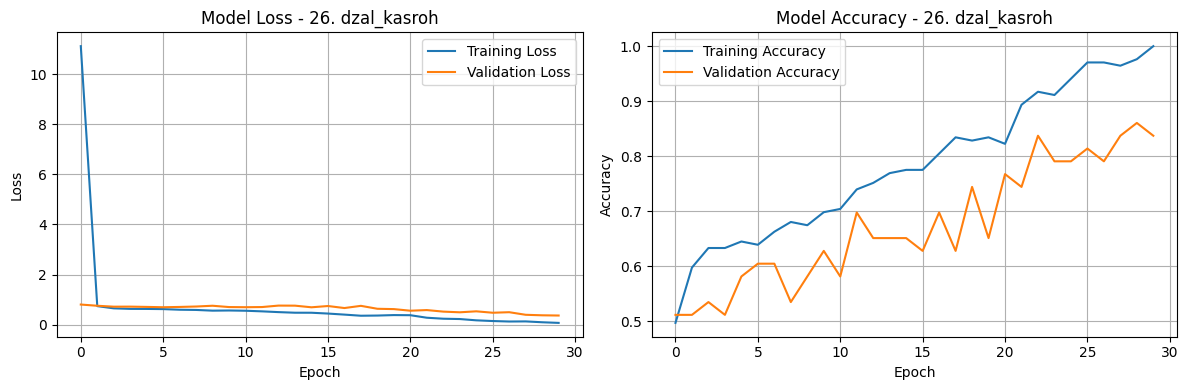

Processing class: 27. dzal_dommah
Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 113ms/step - accuracy: 0.5220 - loss: 5.0698 - val_accuracy: 0.5349 - val_loss: 0.7829
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - accuracy: 0.5342 - loss: 0.7686 - val_accuracy: 0.5814 - val_loss: 0.6864
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.5051 - loss: 0.6951 - val_accuracy: 0.6279 - val_loss: 0.6703
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - accuracy: 0.6263 - loss: 0.6530 - val_accuracy: 0.6279 - val_loss: 0.6913
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.6347 - loss: 0.6277 - val_accuracy: 0.5814 - val_loss: 0.6857
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.6559 - loss: 0.5728 - val_accuracy: 0.6512 - val_loss: 0.7029
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.6509 - loss: 0.5844 - val_accuracy: 0.6744 - val_loss: 0.6629
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.7314 - loss: 0.5387 - val_a

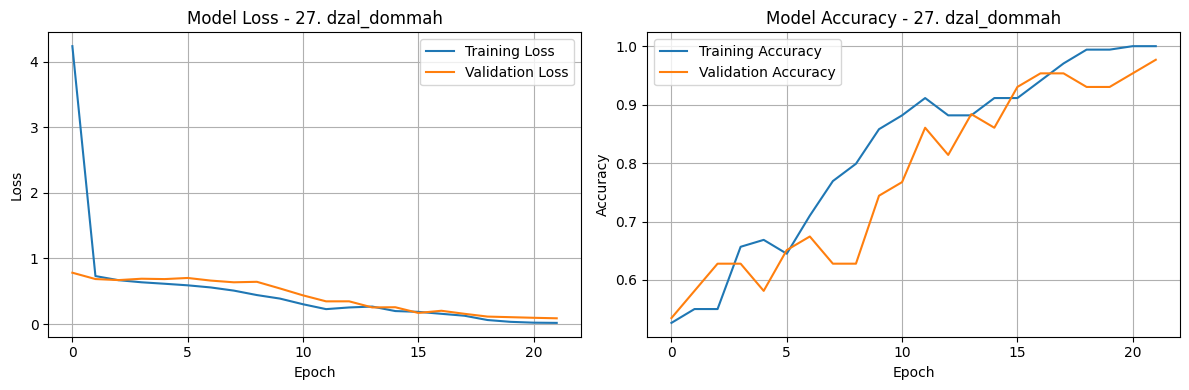

Processing class: 28. ra_fathah
Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.3670 - loss: 8.8286 - val_accuracy: 0.5116 - val_loss: 0.8326
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - accuracy: 0.4880 - loss: 0.7849 - val_accuracy: 0.4651 - val_loss: 0.7059
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.6319 - loss: 0.6470 - val_accuracy: 0.5581 - val_loss: 0.7051
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - accuracy: 0.6704 - loss: 0.6190 - val_accuracy: 0.5349 - val_loss: 0.6726
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.6803 - loss: 0.5642 - val_accuracy: 0.5814 - val_loss: 0.9453
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.6956 - loss: 0.5972 - val_accuracy: 0.5814 - val_loss: 0.6431
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.8638 - loss: 0.4744 - val_accuracy: 0.7674 - val_loss: 0.5620
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.8728 - loss: 0.3585 - val_acc

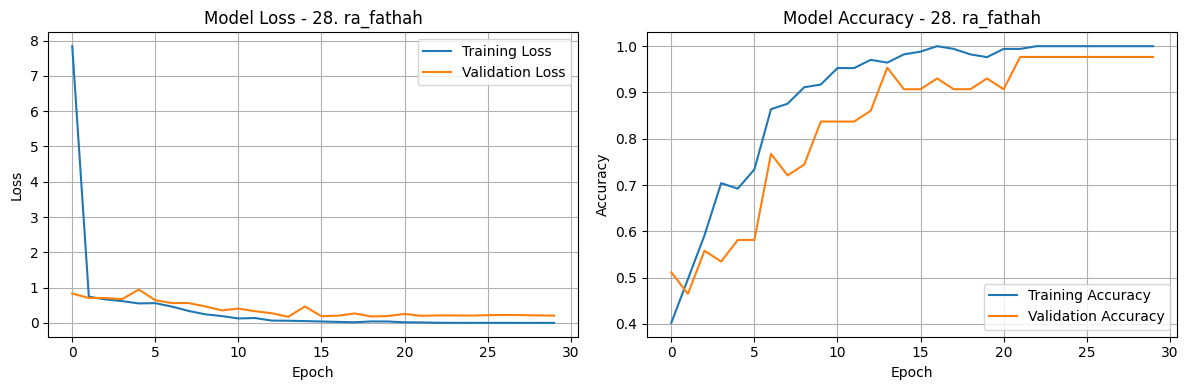

Processing class: 29. ra_kasroh
Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 127ms/step - accuracy: 0.4882 - loss: 9.4350 - val_accuracy: 0.5116 - val_loss: 1.2438
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - accuracy: 0.5410 - loss: 0.9470 - val_accuracy: 0.5581 - val_loss: 0.9937
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - accuracy: 0.6598 - loss: 0.7406 - val_accuracy: 0.5581 - val_loss: 0.8615
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.6517 - loss: 0.6749 - val_accuracy: 0.5581 - val_loss: 0.7878
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - accuracy: 0.7043 - loss: 0.6177 - val_accuracy: 0.5581 - val_loss: 0.7341
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.6373 - loss: 0.6228 - val_accuracy: 0.5581 - val_loss: 0.7186
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.6731 - loss: 0.6123 - val_accuracy: 0.5581 - val_loss: 0.7711
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.6786 - loss: 0.5962 - val_ac

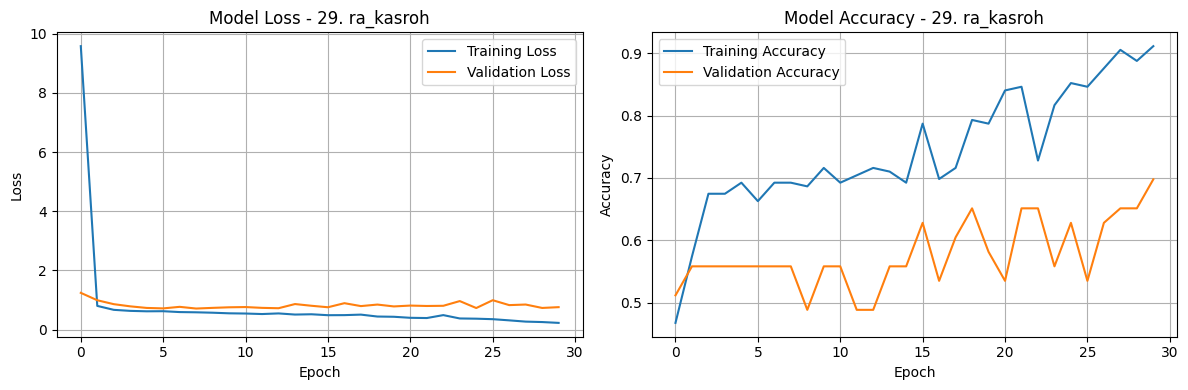

Processing class: 30. ra_dommah
Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 123ms/step - accuracy: 0.4480 - loss: 7.4775 - val_accuracy: 0.4884 - val_loss: 0.8049
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - accuracy: 0.4915 - loss: 0.7646 - val_accuracy: 0.5814 - val_loss: 0.6536
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - accuracy: 0.5800 - loss: 0.6563 - val_accuracy: 0.6047 - val_loss: 0.6431
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.6513 - loss: 0.6226 - val_accuracy: 0.6047 - val_loss: 0.6307
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - accuracy: 0.6093 - loss: 0.6509 - val_accuracy: 0.5349 - val_loss: 0.6233
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - accuracy: 0.6333 - loss: 0.6117 - val_accuracy: 0.5116 - val_loss: 0.6365
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - accuracy: 0.6730 - loss: 0.6397 - val_accuracy: 0.5349 - val_loss: 0.6268
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - accuracy: 0.6807 - loss: 0.6053 - val_ac

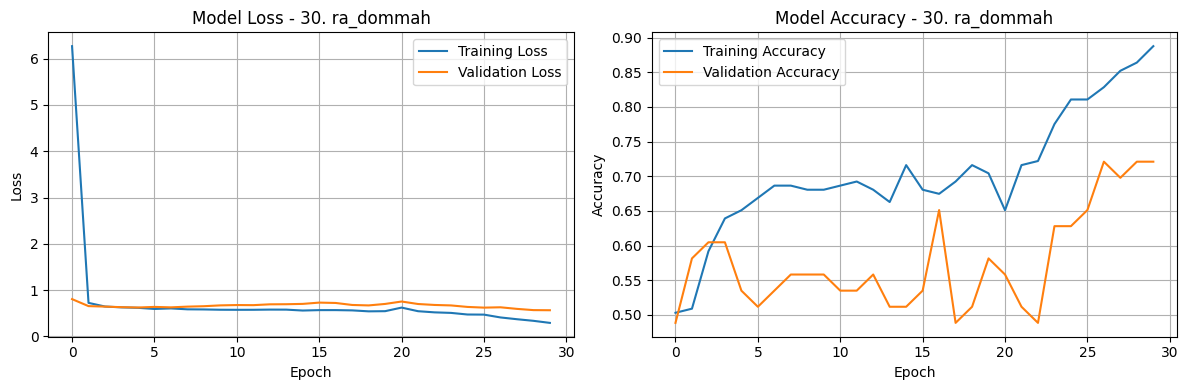

Processing class: 31. zay_fathah
Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 110ms/step - accuracy: 0.5985 - loss: 11.2225 - val_accuracy: 0.5116 - val_loss: 0.8391
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - accuracy: 0.4761 - loss: 1.1976 - val_accuracy: 0.6047 - val_loss: 0.6821
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.5801 - loss: 0.6529 - val_accuracy: 0.5349 - val_loss: 0.8142
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - accuracy: 0.5105 - loss: 0.7123 - val_accuracy: 0.5581 - val_loss: 0.6763
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.6704 - loss: 0.6080 - val_accuracy: 0.7209 - val_loss: 0.6769
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.8414 - loss: 0.5534 - val_accuracy: 0.6512 - val_loss: 0.6360
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - accuracy: 0.7718 - loss: 0.5223 - val_accuracy: 0.5581 - val_loss: 0.7096
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.6940 - loss: 0.4873 - val_a

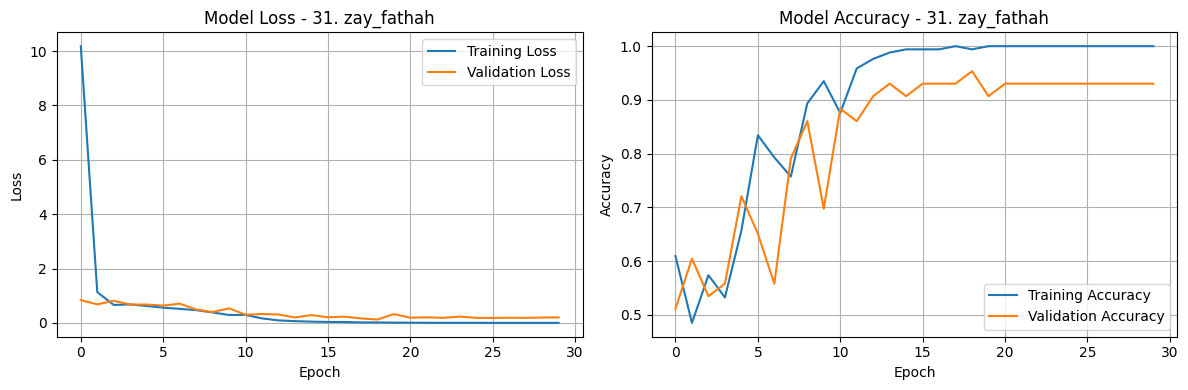

Processing class: 32. zay_kasroh
Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 118ms/step - accuracy: 0.4190 - loss: 10.3707 - val_accuracy: 0.5581 - val_loss: 0.7347
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - accuracy: 0.6566 - loss: 0.6524 - val_accuracy: 0.5814 - val_loss: 0.6889
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - accuracy: 0.6503 - loss: 0.6164 - val_accuracy: 0.6279 - val_loss: 0.6829
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.6765 - loss: 0.5937 - val_accuracy: 0.6279 - val_loss: 0.6863
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - accuracy: 0.6964 - loss: 0.5689 - val_accuracy: 0.5581 - val_loss: 0.6684
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - accuracy: 0.6940 - loss: 0.5804 - val_accuracy: 0.6047 - val_loss: 0.6450
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 0.7285 - loss: 0.5475 - val_accuracy: 0.7442 - val_loss: 0.6377
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.7758 - loss: 0.5329 - val_a

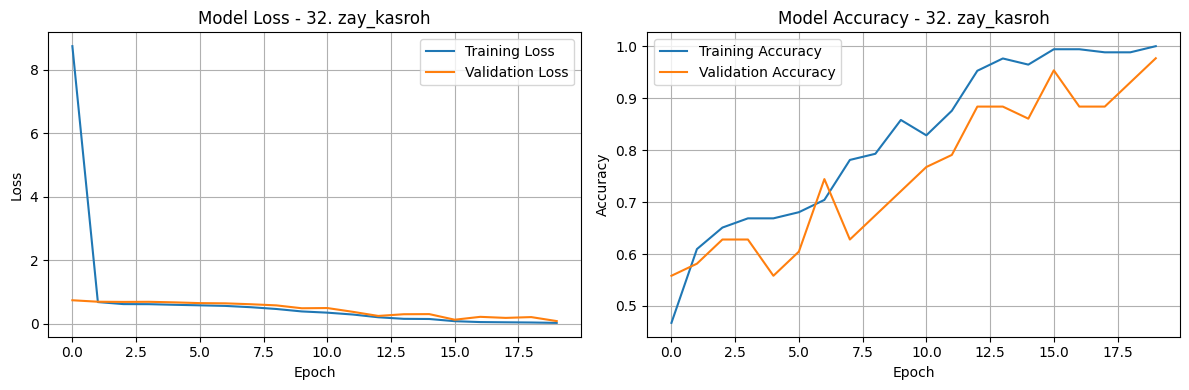

Processing class: 33. zay_dommah
Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step - accuracy: 0.5377 - loss: 5.3855 - val_accuracy: 0.6047 - val_loss: 0.7392
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - accuracy: 0.5763 - loss: 0.7043 - val_accuracy: 0.5116 - val_loss: 0.7661
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - accuracy: 0.4818 - loss: 0.7622 - val_accuracy: 0.6279 - val_loss: 0.6636
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.6707 - loss: 0.6592 - val_accuracy: 0.6279 - val_loss: 0.6458
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 0.6721 - loss: 0.6482 - val_accuracy: 0.6047 - val_loss: 0.6548
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.6272 - loss: 0.6313 - val_accuracy: 0.6047 - val_loss: 0.6216
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - accuracy: 0.6348 - loss: 0.5962 - val_accuracy: 0.6977 - val_loss: 0.5871
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - accuracy: 0.7309 - loss: 0.5544 - val_ac

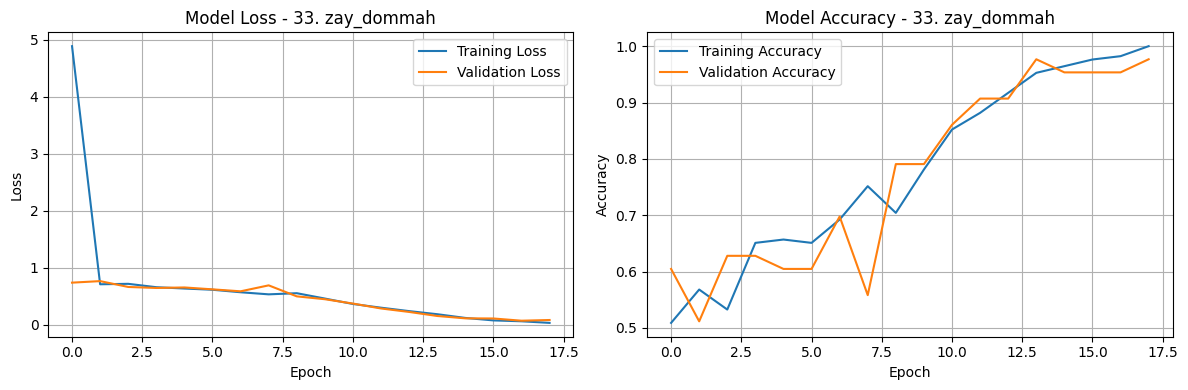

Processing class: 34. sin_fathah
Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 116ms/step - accuracy: 0.4824 - loss: 12.2373 - val_accuracy: 0.4884 - val_loss: 0.9284
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - accuracy: 0.6326 - loss: 0.6697 - val_accuracy: 0.4651 - val_loss: 0.7411
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - accuracy: 0.6433 - loss: 0.6403 - val_accuracy: 0.3953 - val_loss: 0.8001
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.6083 - loss: 0.6341 - val_accuracy: 0.4186 - val_loss: 0.8070
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - accuracy: 0.6959 - loss: 0.5796 - val_accuracy: 0.5349 - val_loss: 0.8562
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - accuracy: 0.5749 - loss: 0.6530 - val_accuracy: 0.6512 - val_loss: 0.6844
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - accuracy: 0.7935 - loss: 0.5447 - val_accuracy: 0.5581 - val_loss: 0.8312
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.7426 - loss: 0.5426 - val_a

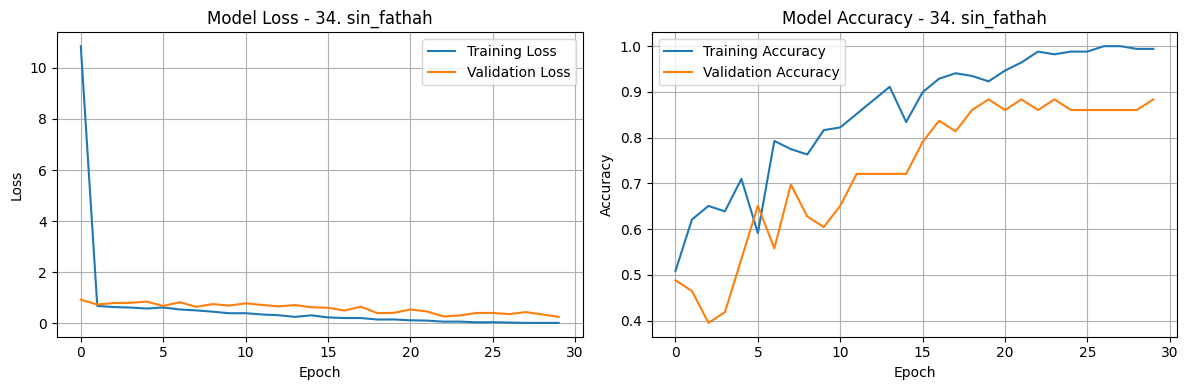

Processing class: 35. sin_kasroh
Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 119ms/step - accuracy: 0.4120 - loss: 7.8909 - val_accuracy: 0.5814 - val_loss: 0.7189
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - accuracy: 0.5691 - loss: 0.7241 - val_accuracy: 0.5814 - val_loss: 0.6815
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.5814 - loss: 0.6651 - val_accuracy: 0.4884 - val_loss: 0.7189
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.6801 - loss: 0.6264 - val_accuracy: 0.5814 - val_loss: 0.7488
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - accuracy: 0.5850 - loss: 0.6643 - val_accuracy: 0.5349 - val_loss: 0.7618
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - accuracy: 0.6655 - loss: 0.5961 - val_accuracy: 0.5581 - val_loss: 0.7674
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - accuracy: 0.6872 - loss: 0.5641 - val_accuracy: 0.4651 - val_loss: 0.7370
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - accuracy: 0.6396 - loss: 0.6230 - val_ac

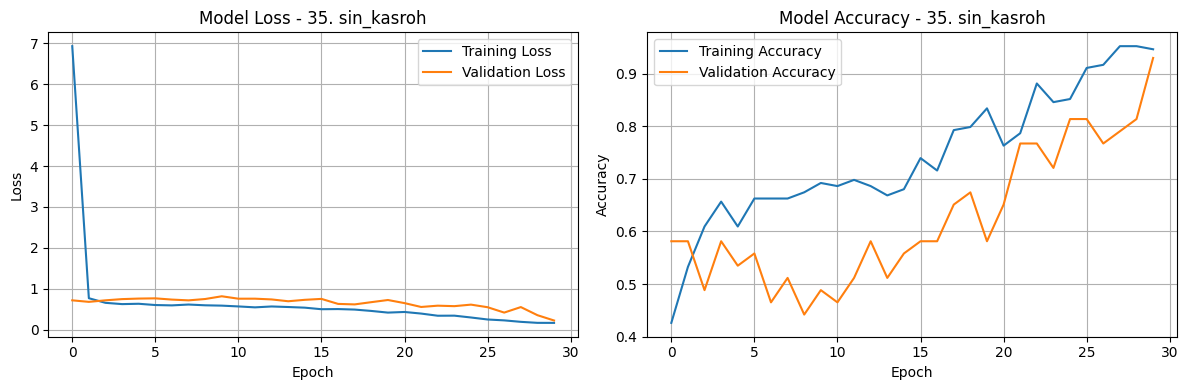

Processing class: 36. sin_dommah
Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 120ms/step - accuracy: 0.5017 - loss: 9.0736 - val_accuracy: 0.4884 - val_loss: 0.9719
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.5660 - loss: 0.7802 - val_accuracy: 0.5814 - val_loss: 0.6723
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - accuracy: 0.6044 - loss: 0.6707 - val_accuracy: 0.5814 - val_loss: 0.6457
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.7014 - loss: 0.6018 - val_accuracy: 0.6279 - val_loss: 0.6388
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.7169 - loss: 0.5814 - val_accuracy: 0.6047 - val_loss: 0.6112
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 0.6061 - loss: 0.6011 - val_accuracy: 0.5814 - val_loss: 0.5933
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.6527 - loss: 0.5608 - val_accuracy: 0.6744 - val_loss: 0.6097
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.7762 - loss: 0.4947 - val_a

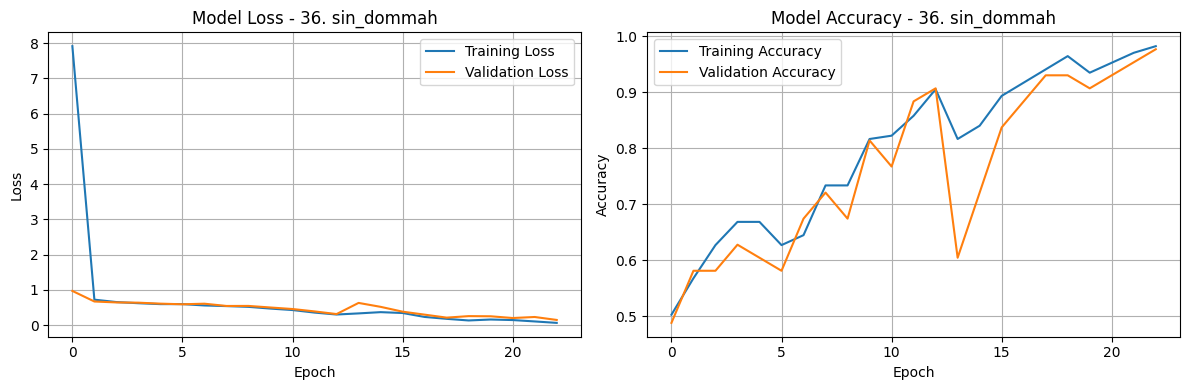

Processing class: 37. shin_fathah
Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step - accuracy: 0.4605 - loss: 9.0388 - val_accuracy: 0.5116 - val_loss: 0.9906
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - accuracy: 0.4895 - loss: 0.8640 - val_accuracy: 0.5581 - val_loss: 0.6798
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - accuracy: 0.5164 - loss: 0.6724 - val_accuracy: 0.5814 - val_loss: 0.6616
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - accuracy: 0.5904 - loss: 0.6471 - val_accuracy: 0.6279 - val_loss: 0.6454
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - accuracy: 0.7101 - loss: 0.5852 - val_accuracy: 0.6047 - val_loss: 0.6187
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - accuracy: 0.7691 - loss: 0.5218 - val_accuracy: 0.7209 - val_loss: 0.5538
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 0.8146 - loss: 0.4550 - val_accuracy: 0.6977 - val_loss: 0.5117
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.8107 - loss: 0.4357 - val_

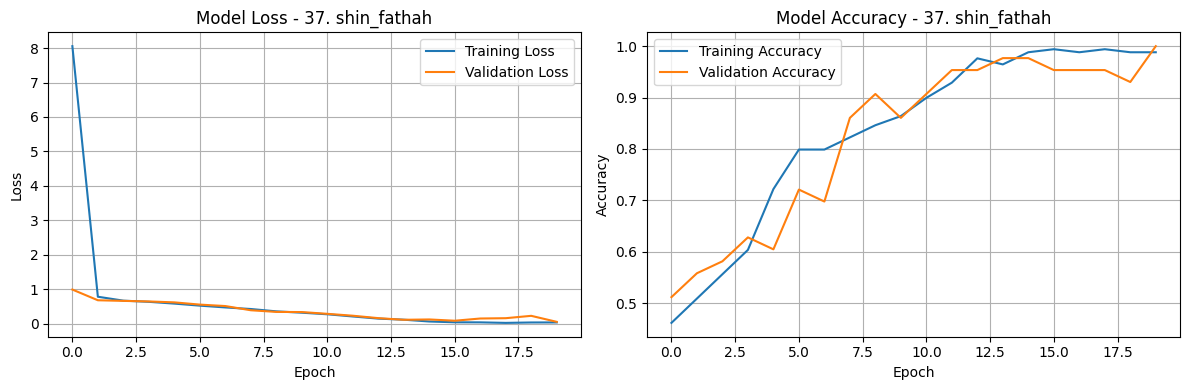

Processing class: 38. shin_kasroh
Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 132ms/step - accuracy: 0.4866 - loss: 6.7804 - val_accuracy: 0.5814 - val_loss: 0.6852
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.5188 - loss: 0.7253 - val_accuracy: 0.6279 - val_loss: 0.7646
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - accuracy: 0.5557 - loss: 0.7007 - val_accuracy: 0.5349 - val_loss: 0.6364
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.6626 - loss: 0.5834 - val_accuracy: 0.6047 - val_loss: 0.7933
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - accuracy: 0.6258 - loss: 0.6942 - val_accuracy: 0.6047 - val_loss: 0.6150
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.6435 - loss: 0.6011 - val_accuracy: 0.6512 - val_loss: 0.5820
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.7182 - loss: 0.5598 - val_accuracy: 0.7442 - val_loss: 0.5928
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.7257 - loss: 0.5506 - val_

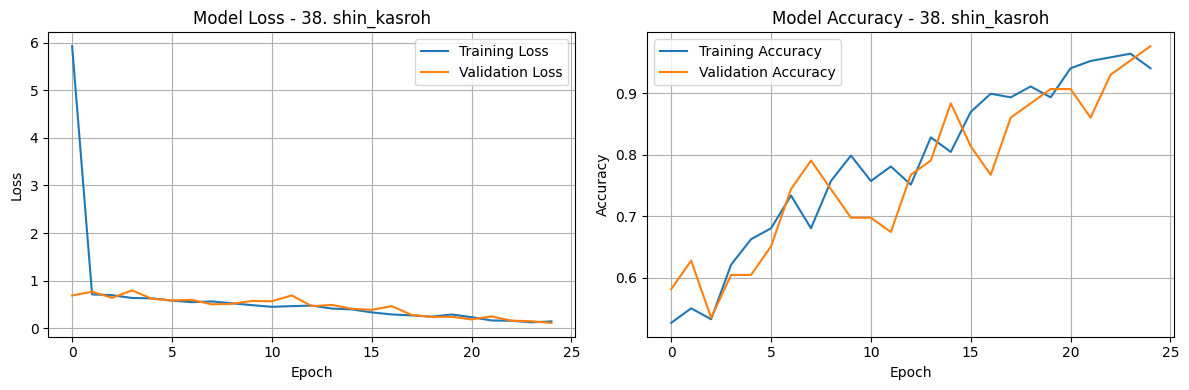

Processing class: 39. shin_dommah
Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 140ms/step - accuracy: 0.5138 - loss: 5.0566 - val_accuracy: 0.4651 - val_loss: 0.7104
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - accuracy: 0.6570 - loss: 0.6300 - val_accuracy: 0.6279 - val_loss: 0.6073
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - accuracy: 0.6246 - loss: 0.6476 - val_accuracy: 0.6047 - val_loss: 0.6009
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.6910 - loss: 0.5699 - val_accuracy: 0.6977 - val_loss: 0.5418
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.7628 - loss: 0.5109 - val_accuracy: 0.7209 - val_loss: 0.4972
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - accuracy: 0.7781 - loss: 0.4447 - val_accuracy: 0.8372 - val_loss: 0.3628
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.9103 - loss: 0.2921 - val_accuracy: 1.0000 - val_loss: 0.1792
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.9436 - loss: 0.1662 - val_a

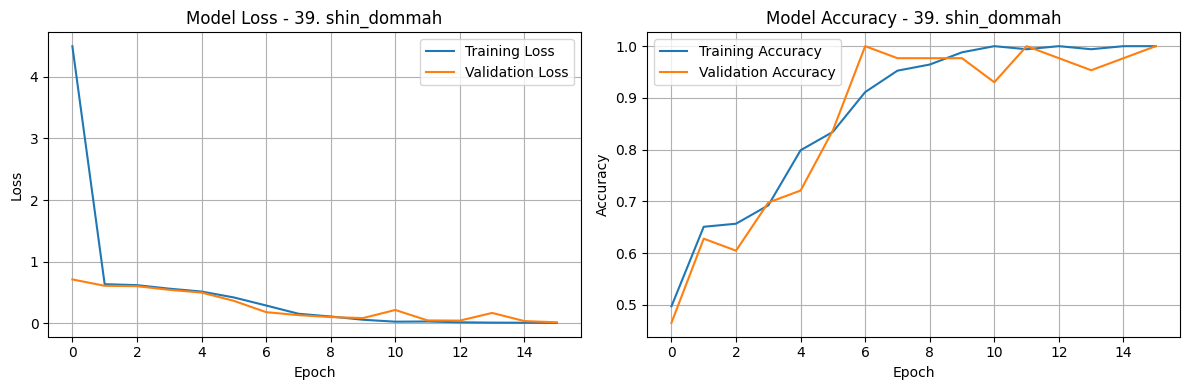

Processing class: 40. sad_fathah
Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 135ms/step - accuracy: 0.5136 - loss: 6.2705 - val_accuracy: 0.5116 - val_loss: 0.7120
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.5447 - loss: 0.7208 - val_accuracy: 0.4651 - val_loss: 0.6990
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - accuracy: 0.5534 - loss: 0.6572 - val_accuracy: 0.5349 - val_loss: 0.7388
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.4910 - loss: 0.7058 - val_accuracy: 0.5814 - val_loss: 0.7692
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 0.6186 - loss: 0.6543 - val_accuracy: 0.5814 - val_loss: 0.7225
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - accuracy: 0.6376 - loss: 0.6205 - val_accuracy: 0.5814 - val_loss: 0.6236
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 0.6854 - loss: 0.5536 - val_accuracy: 0.6047 - val_loss: 0.7016
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - accuracy: 0.6748 - loss: 0.5583 - val_a

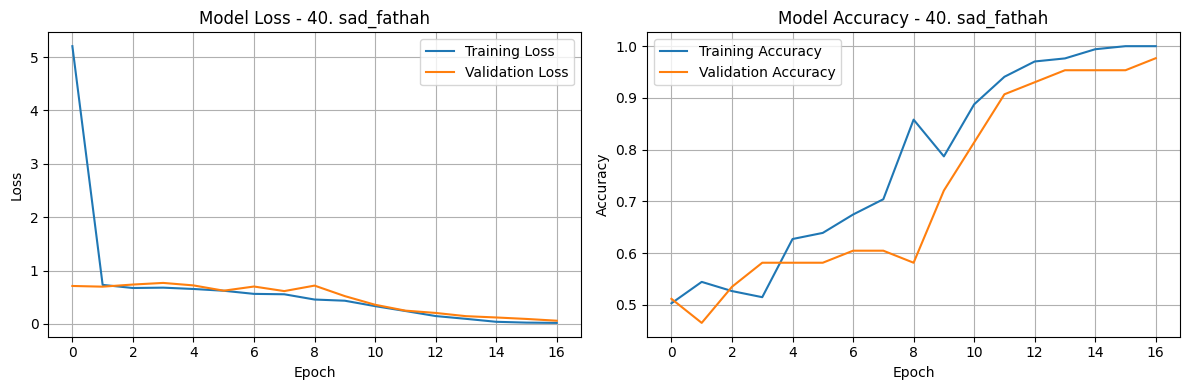

Processing class: 41. sad_kasroh
Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 132ms/step - accuracy: 0.5253 - loss: 8.7743 - val_accuracy: 0.4884 - val_loss: 1.1358
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.5522 - loss: 0.8549 - val_accuracy: 0.5349 - val_loss: 0.7385
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - accuracy: 0.5984 - loss: 0.6735 - val_accuracy: 0.5814 - val_loss: 0.7411
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.6652 - loss: 0.6183 - val_accuracy: 0.5349 - val_loss: 0.7242
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - accuracy: 0.6351 - loss: 0.5979 - val_accuracy: 0.5581 - val_loss: 0.7056
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - accuracy: 0.6601 - loss: 0.5849 - val_accuracy: 0.5814 - val_loss: 0.7653
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 0.6618 - loss: 0.5957 - val_accuracy: 0.5581 - val_loss: 0.7360
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.6708 - loss: 0.5706 - val_ac

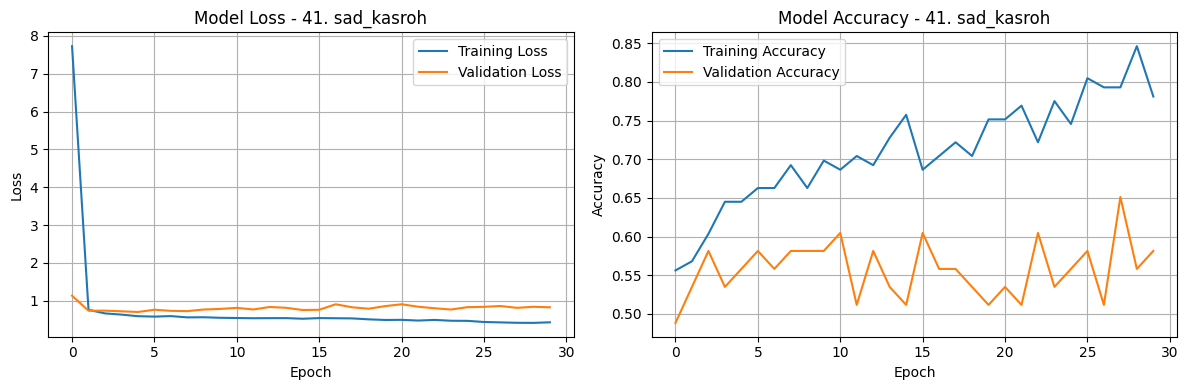

Processing class: 42. sad_dommah
Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 131ms/step - accuracy: 0.5794 - loss: 6.7490 - val_accuracy: 0.6279 - val_loss: 1.0007
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.5275 - loss: 0.8693 - val_accuracy: 0.6512 - val_loss: 0.6714
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - accuracy: 0.5511 - loss: 0.6864 - val_accuracy: 0.5116 - val_loss: 0.6494
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 0.6590 - loss: 0.6147 - val_accuracy: 0.5581 - val_loss: 0.6576
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - accuracy: 0.6199 - loss: 0.6138 - val_accuracy: 0.6279 - val_loss: 0.6388
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 0.6387 - loss: 0.5997 - val_accuracy: 0.5116 - val_loss: 0.6391
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - accuracy: 0.6107 - loss: 0.6098 - val_accuracy: 0.6047 - val_loss: 0.6340
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - accuracy: 0.6785 - loss: 0.5829 - val_a

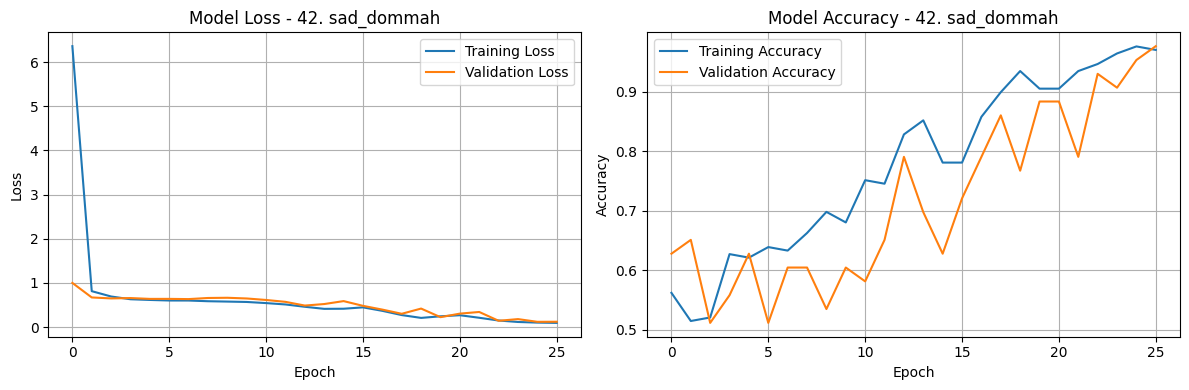

Processing class: 43. dad_fathah
Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 125ms/step - accuracy: 0.5510 - loss: 11.8565 - val_accuracy: 0.3953 - val_loss: 0.8379
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - accuracy: 0.6051 - loss: 0.7112 - val_accuracy: 0.4651 - val_loss: 0.8553
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - accuracy: 0.6585 - loss: 0.6260 - val_accuracy: 0.4419 - val_loss: 0.7645
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - accuracy: 0.6840 - loss: 0.6084 - val_accuracy: 0.4186 - val_loss: 0.7641
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 0.6347 - loss: 0.6401 - val_accuracy: 0.4419 - val_loss: 0.7291
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 0.7367 - loss: 0.5567 - val_accuracy: 0.4884 - val_loss: 0.8346
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 0.7751 - loss: 0.5078 - val_accuracy: 0.5349 - val_loss: 0.7328
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - accuracy: 0.8656 - loss: 0.3776 - val_

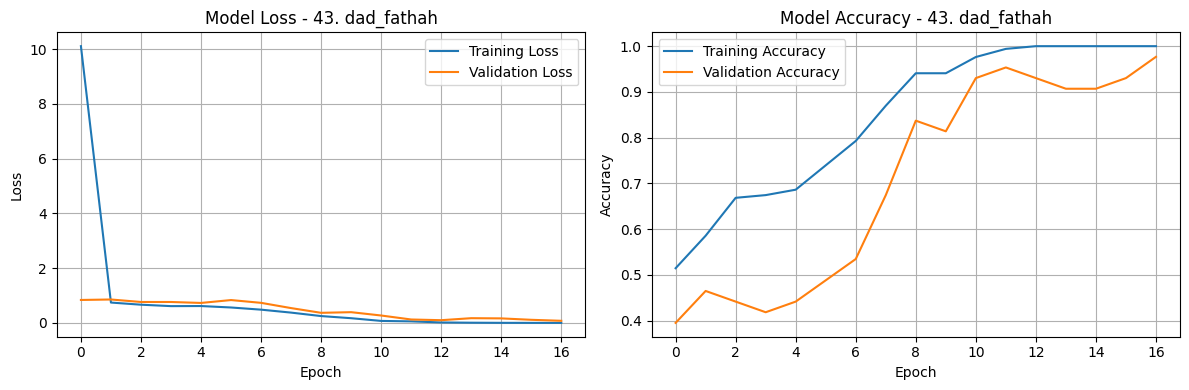

Processing class: 44. dad_kasroh
Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 129ms/step - accuracy: 0.4597 - loss: 5.8130 - val_accuracy: 0.5349 - val_loss: 1.0175
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 0.5056 - loss: 0.9120 - val_accuracy: 0.5349 - val_loss: 0.6575
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - accuracy: 0.5731 - loss: 0.6489 - val_accuracy: 0.5349 - val_loss: 0.7092
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - accuracy: 0.6288 - loss: 0.6284 - val_accuracy: 0.5581 - val_loss: 0.7187
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.5879 - loss: 0.6172 - val_accuracy: 0.5814 - val_loss: 0.7019
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 0.7033 - loss: 0.5820 - val_accuracy: 0.5581 - val_loss: 0.8104
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.6814 - loss: 0.5964 - val_accuracy: 0.5349 - val_loss: 0.8184
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - accuracy: 0.7063 - loss: 0.5801 - val_a

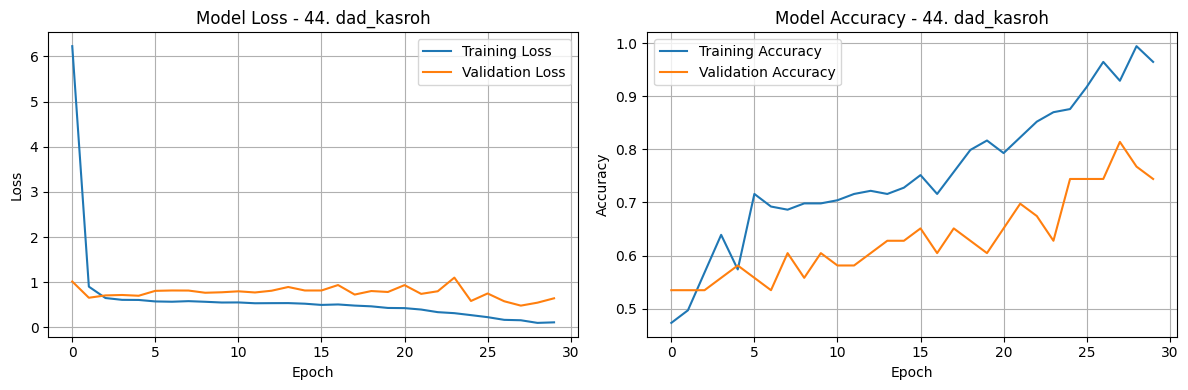

Processing class: 45. dad_dommah
Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 137ms/step - accuracy: 0.4968 - loss: 4.8019 - val_accuracy: 0.5581 - val_loss: 0.9705
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.6511 - loss: 0.7145 - val_accuracy: 0.5814 - val_loss: 0.6604
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.6986 - loss: 0.6198 - val_accuracy: 0.6047 - val_loss: 0.6625
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.6528 - loss: 0.5944 - val_accuracy: 0.5116 - val_loss: 0.6705
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.5565 - loss: 0.6139 - val_accuracy: 0.5581 - val_loss: 0.6300
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.6925 - loss: 0.5686 - val_accuracy: 0.5349 - val_loss: 0.6489
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - accuracy: 0.6451 - loss: 0.5751 - val_accuracy: 0.6279 - val_loss: 0.6876
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - accuracy: 0.7188 - loss: 0.5647 - val_

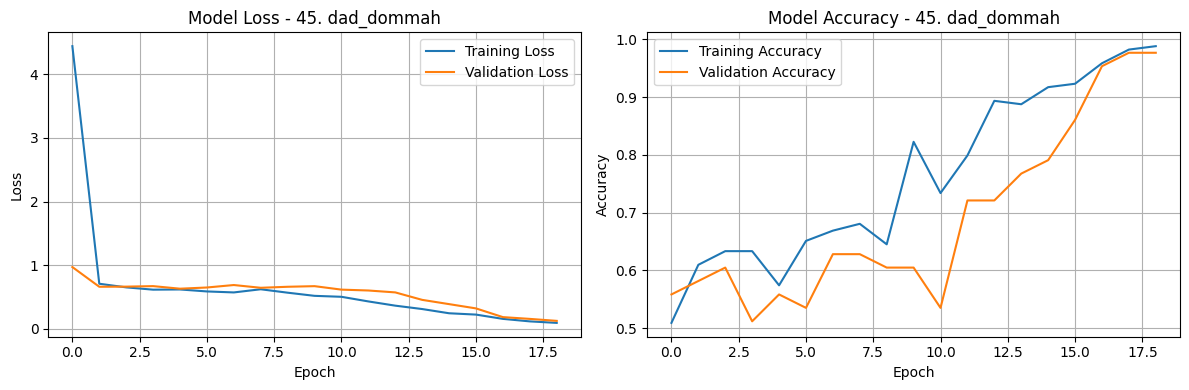

Processing class: 46. tah_fathah
Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 115ms/step - accuracy: 0.4313 - loss: 11.5935 - val_accuracy: 0.5581 - val_loss: 0.9105
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step - accuracy: 0.5364 - loss: 0.8642 - val_accuracy: 0.5116 - val_loss: 0.7049
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.5759 - loss: 0.6630 - val_accuracy: 0.4419 - val_loss: 0.7712
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.6142 - loss: 0.6352 - val_accuracy: 0.5349 - val_loss: 0.7376
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.5791 - loss: 0.6504 - val_accuracy: 0.5581 - val_loss: 0.7132
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - accuracy: 0.7488 - loss: 0.5777 - val_accuracy: 0.7209 - val_loss: 0.7779
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.7224 - loss: 0.5452 - val_accuracy: 0.6744 - val_loss: 0.6525
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.8192 - loss: 0.4299 - val_

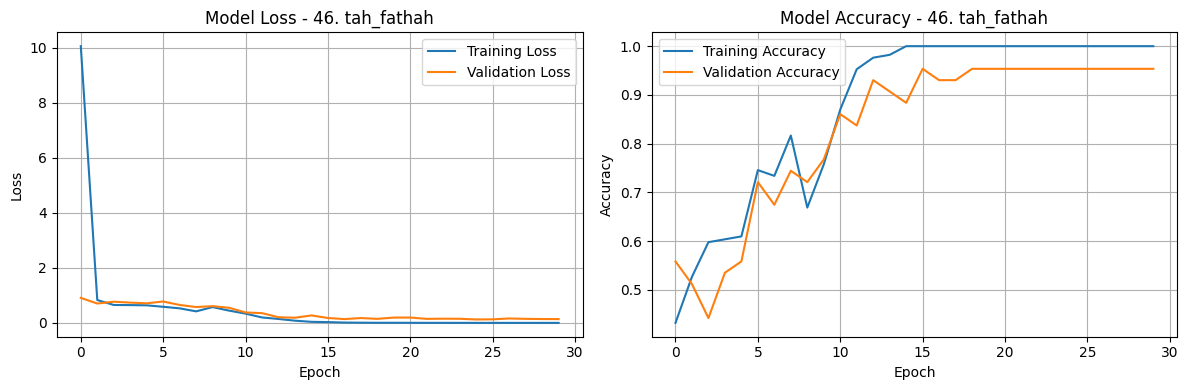

Processing class: 47. tah_kasroh
Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 134ms/step - accuracy: 0.4916 - loss: 8.9557 - val_accuracy: 0.5116 - val_loss: 0.7120
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - accuracy: 0.5776 - loss: 0.6892 - val_accuracy: 0.5581 - val_loss: 0.6711
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - accuracy: 0.6780 - loss: 0.6111 - val_accuracy: 0.5814 - val_loss: 0.6556
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - accuracy: 0.6625 - loss: 0.6112 - val_accuracy: 0.5581 - val_loss: 0.6815
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.6240 - loss: 0.6242 - val_accuracy: 0.5581 - val_loss: 0.6680
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.6776 - loss: 0.6004 - val_accuracy: 0.5581 - val_loss: 0.6663
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 0.6729 - loss: 0.5712 - val_accuracy: 0.6047 - val_loss: 0.6829
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.6704 - loss: 0.5933 - val_ac

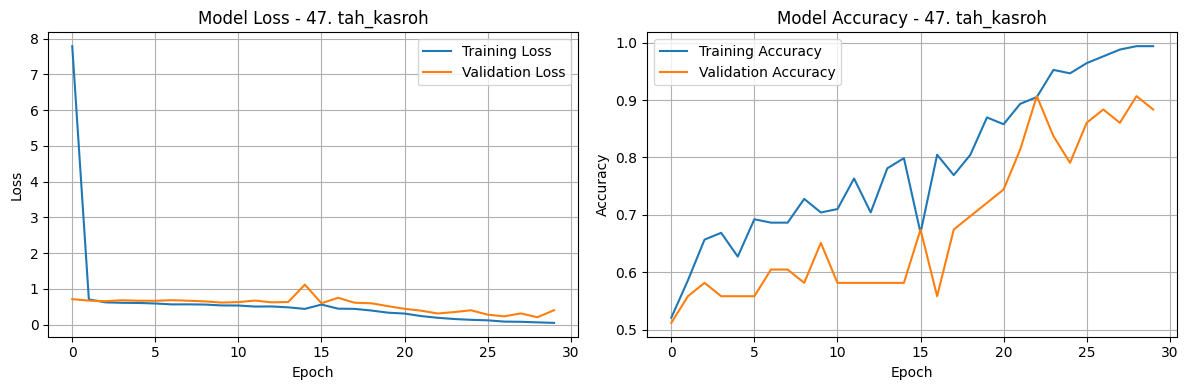

Processing class: 48. tah_dommah
Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 134ms/step - accuracy: 0.5327 - loss: 6.0972 - val_accuracy: 0.4884 - val_loss: 0.8605
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.5358 - loss: 0.7389 - val_accuracy: 0.6512 - val_loss: 0.9838
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 0.5878 - loss: 0.7435 - val_accuracy: 0.6047 - val_loss: 0.6568
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.6143 - loss: 0.6286 - val_accuracy: 0.6512 - val_loss: 0.6771
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.6363 - loss: 0.5959 - val_accuracy: 0.5581 - val_loss: 0.6988
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - accuracy: 0.6384 - loss: 0.6216 - val_accuracy: 0.6279 - val_loss: 0.6560
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 0.6717 - loss: 0.5891 - val_accuracy: 0.6279 - val_loss: 0.6806
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.5696 - loss: 0.6130 - val_ac

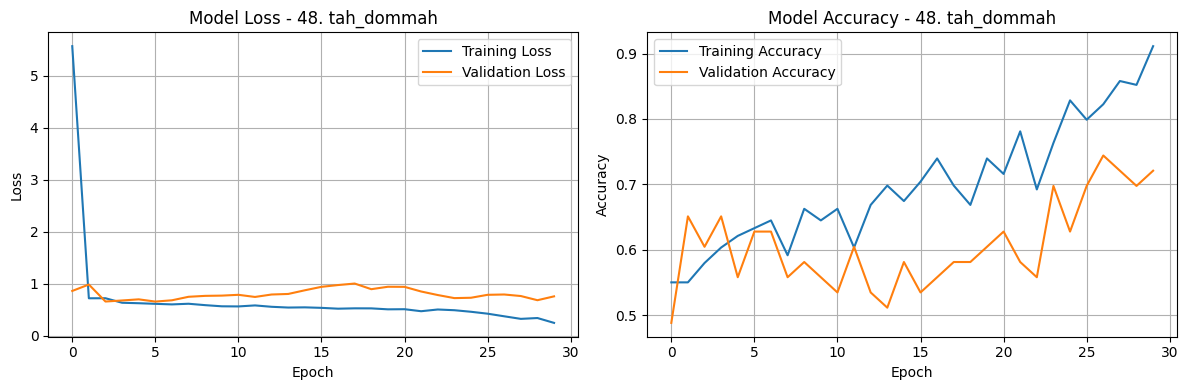

Processing class: 49. zah_fathah
Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 114ms/step - accuracy: 0.4706 - loss: 8.2166 - val_accuracy: 0.4884 - val_loss: 1.3689
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.4705 - loss: 0.9878 - val_accuracy: 0.6279 - val_loss: 0.6653
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 0.6716 - loss: 0.6377 - val_accuracy: 0.5814 - val_loss: 0.6514
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.5932 - loss: 0.6239 - val_accuracy: 0.5349 - val_loss: 0.6747
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - accuracy: 0.7117 - loss: 0.5560 - val_accuracy: 0.5814 - val_loss: 0.5878
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - accuracy: 0.8093 - loss: 0.5036 - val_accuracy: 0.8372 - val_loss: 0.4975
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - accuracy: 0.8475 - loss: 0.4176 - val_accuracy: 0.9302 - val_loss: 0.3458
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - accuracy: 0.9492 - loss: 0.2528 - val_

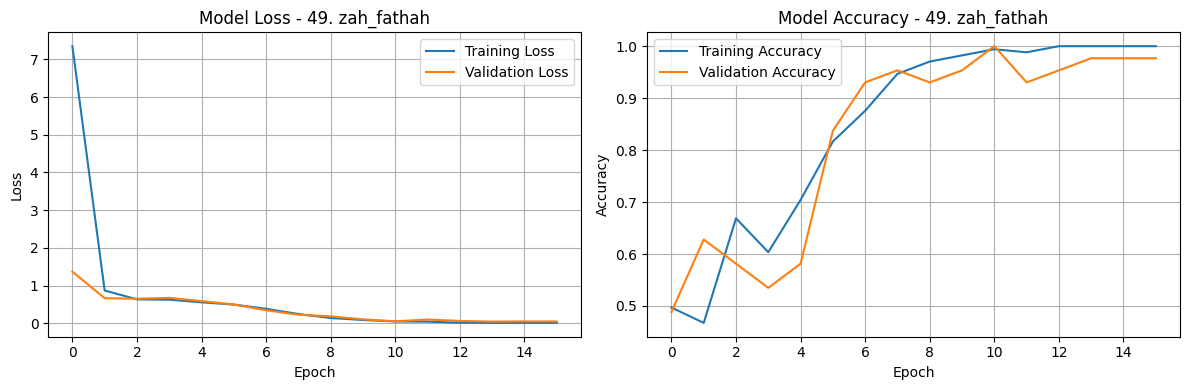

Processing class: 50. zah_kasroh
Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 124ms/step - accuracy: 0.5228 - loss: 11.5132 - val_accuracy: 0.5581 - val_loss: 0.8031
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.5826 - loss: 0.7040 - val_accuracy: 0.5581 - val_loss: 0.7156
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.6307 - loss: 0.6476 - val_accuracy: 0.5581 - val_loss: 0.7214
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.6579 - loss: 0.6037 - val_accuracy: 0.5581 - val_loss: 0.7197
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.6559 - loss: 0.5866 - val_accuracy: 0.5814 - val_loss: 0.7369
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 0.6731 - loss: 0.5617 - val_accuracy: 0.5814 - val_loss: 0.7423
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - accuracy: 0.6955 - loss: 0.5686 - val_accuracy: 0.5581 - val_loss: 0.7465
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - accuracy: 0.7048 - loss: 0.5764 - val_a

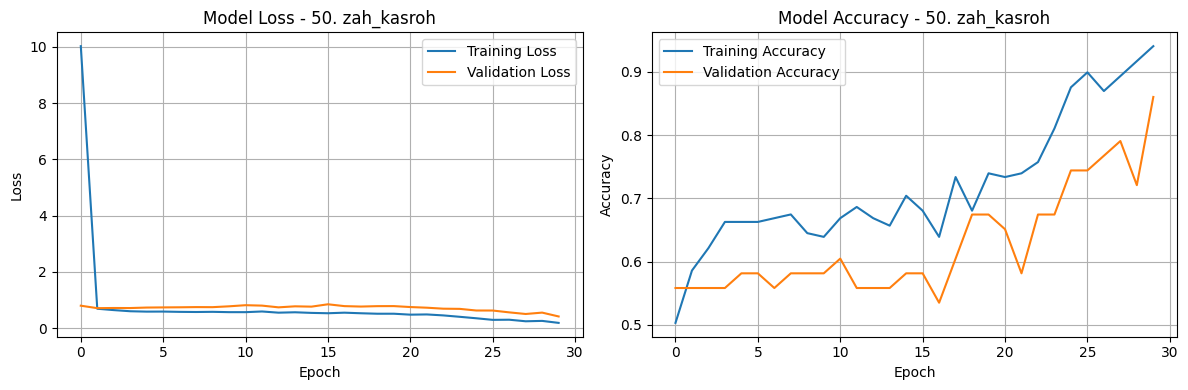

Processing class: 51. zah_dommah
Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 132ms/step - accuracy: 0.5041 - loss: 7.4704 - val_accuracy: 0.4884 - val_loss: 0.7387
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.5421 - loss: 0.7436 - val_accuracy: 0.5581 - val_loss: 0.6664
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step - accuracy: 0.5893 - loss: 0.6693 - val_accuracy: 0.5581 - val_loss: 0.6448
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.6184 - loss: 0.6417 - val_accuracy: 0.5814 - val_loss: 0.6278
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - accuracy: 0.5941 - loss: 0.6333 - val_accuracy: 0.5814 - val_loss: 0.6194
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - accuracy: 0.6200 - loss: 0.6127 - val_accuracy: 0.6279 - val_loss: 0.6371
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - accuracy: 0.6312 - loss: 0.6108 - val_accuracy: 0.6047 - val_loss: 0.6335
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 0.5531 - loss: 0.6203 - val_a

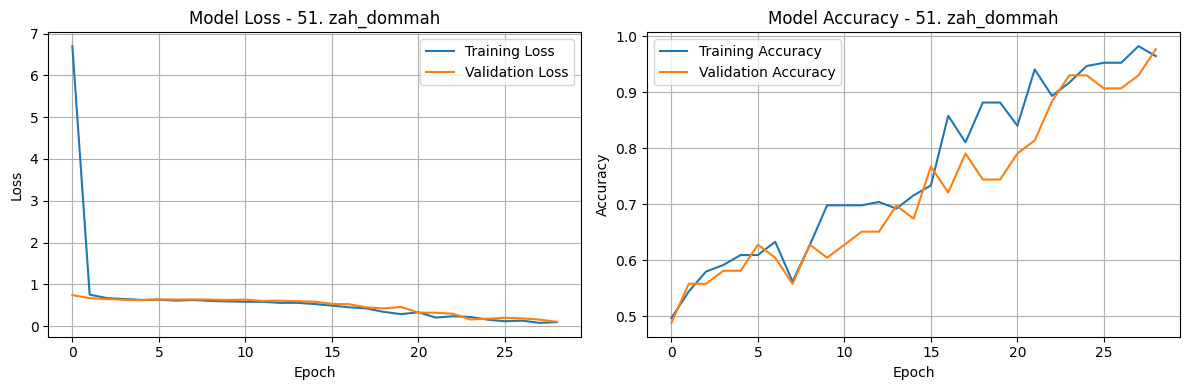

Processing class: 52. ain_fathah
Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - accuracy: 0.4725 - loss: 10.9452 - val_accuracy: 0.4884 - val_loss: 0.9575
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.3866 - loss: 0.8896 - val_accuracy: 0.5814 - val_loss: 0.6812
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - accuracy: 0.5171 - loss: 0.6911 - val_accuracy: 0.5581 - val_loss: 0.6796
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.6538 - loss: 0.6426 - val_accuracy: 0.6047 - val_loss: 0.6579
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.7054 - loss: 0.6070 - val_accuracy: 0.6744 - val_loss: 0.6290
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 0.6796 - loss: 0.6170 - val_accuracy: 0.6047 - val_loss: 0.6745
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - accuracy: 0.6954 - loss: 0.5600 - val_accuracy: 0.6279 - val_loss: 0.5981
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - accuracy: 0.7817 - loss: 0.5042 - val_a

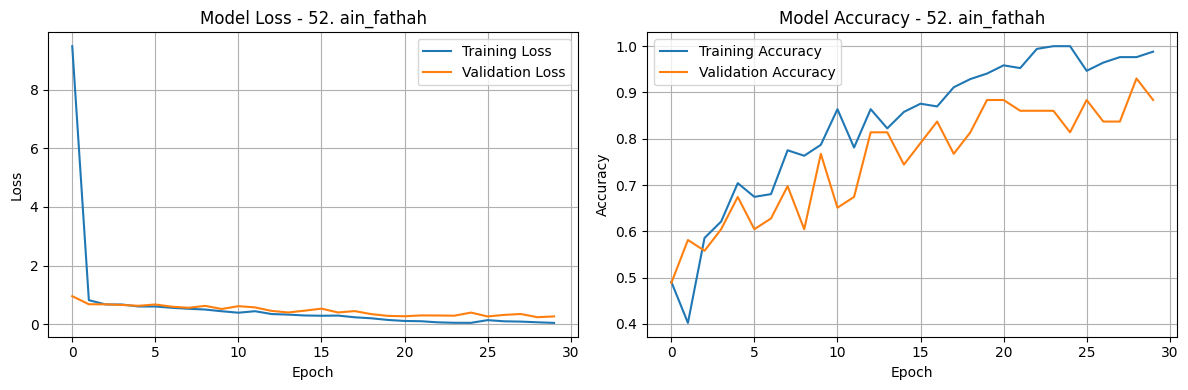

Processing class: 53. ain_kasroh
Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 111ms/step - accuracy: 0.4723 - loss: 13.6381 - val_accuracy: 0.5581 - val_loss: 0.6994
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.6338 - loss: 0.6485 - val_accuracy: 0.6279 - val_loss: 0.6844
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.6346 - loss: 0.6229 - val_accuracy: 0.6047 - val_loss: 0.6723
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - accuracy: 0.6324 - loss: 0.6062 - val_accuracy: 0.5814 - val_loss: 0.6515
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.6489 - loss: 0.6127 - val_accuracy: 0.5581 - val_loss: 0.7770
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.6892 - loss: 0.5923 - val_accuracy: 0.5581 - val_loss: 0.6386
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.6737 - loss: 0.5856 - val_accuracy: 0.5814 - val_loss: 0.6071
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.6563 - loss: 0.5609 - val_a

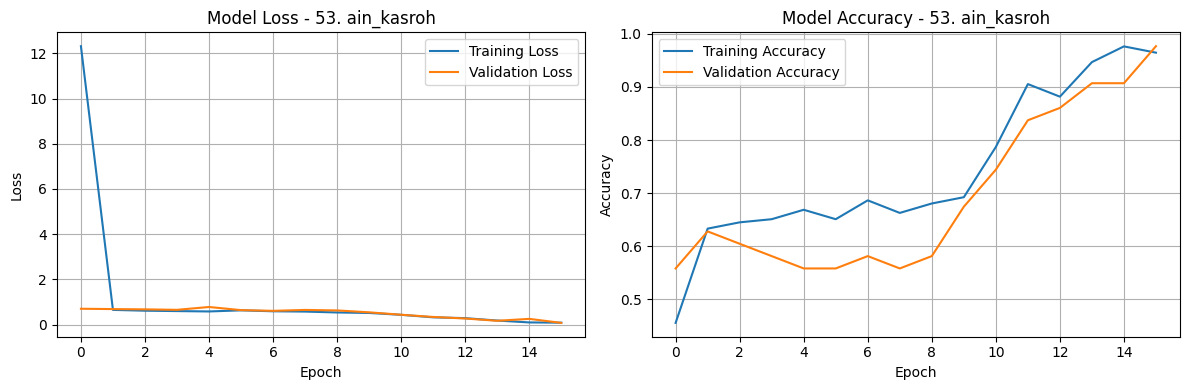

Processing class: 54. ain_dommah
Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 115ms/step - accuracy: 0.4724 - loss: 14.8738 - val_accuracy: 0.5116 - val_loss: 0.7863
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - accuracy: 0.5314 - loss: 0.7295 - val_accuracy: 0.5349 - val_loss: 0.7446
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - accuracy: 0.5606 - loss: 0.6613 - val_accuracy: 0.5814 - val_loss: 0.6622
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.6283 - loss: 0.6432 - val_accuracy: 0.5814 - val_loss: 0.8231
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.6123 - loss: 0.6919 - val_accuracy: 0.5349 - val_loss: 0.6677
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.5023 - loss: 0.6620 - val_accuracy: 0.5349 - val_loss: 0.6526
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.5033 - loss: 0.6464 - val_accuracy: 0.5349 - val_loss: 0.6461
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.4882 - loss: 0.6372 - val_a

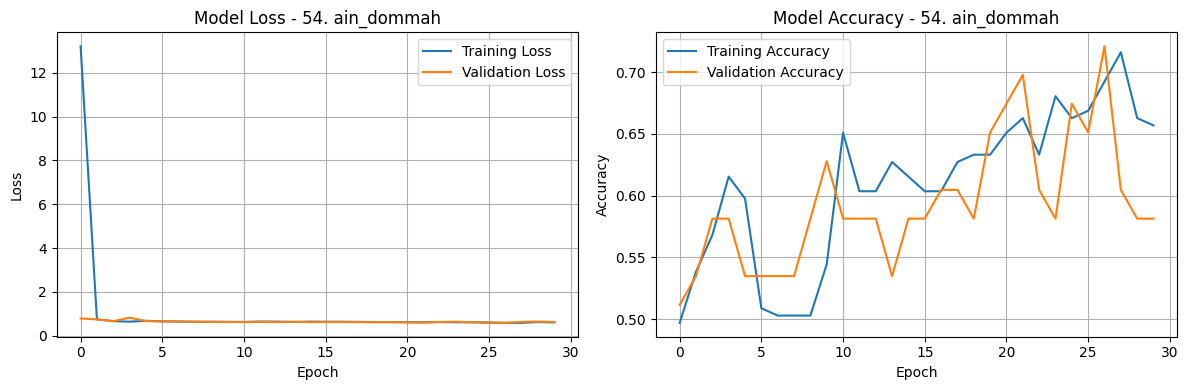

Processing class: 55. ghaiin_fathah
Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 140ms/step - accuracy: 0.5770 - loss: 6.0934 - val_accuracy: 0.4884 - val_loss: 1.0678
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - accuracy: 0.5320 - loss: 0.7895 - val_accuracy: 0.4651 - val_loss: 0.7241
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - accuracy: 0.6482 - loss: 0.6033 - val_accuracy: 0.7209 - val_loss: 0.5993
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - accuracy: 0.7916 - loss: 0.5011 - val_accuracy: 0.7674 - val_loss: 0.4434
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - accuracy: 0.8614 - loss: 0.3808 - val_accuracy: 0.9302 - val_loss: 0.2728
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - accuracy: 0.9570 - loss: 0.1986 - val_accuracy: 0.9302 - val_loss: 0.1995
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.9362 - loss: 0.1290 - val_accuracy: 0.9070 - val_loss: 0.2063
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.9710 - loss: 0.0756 - val

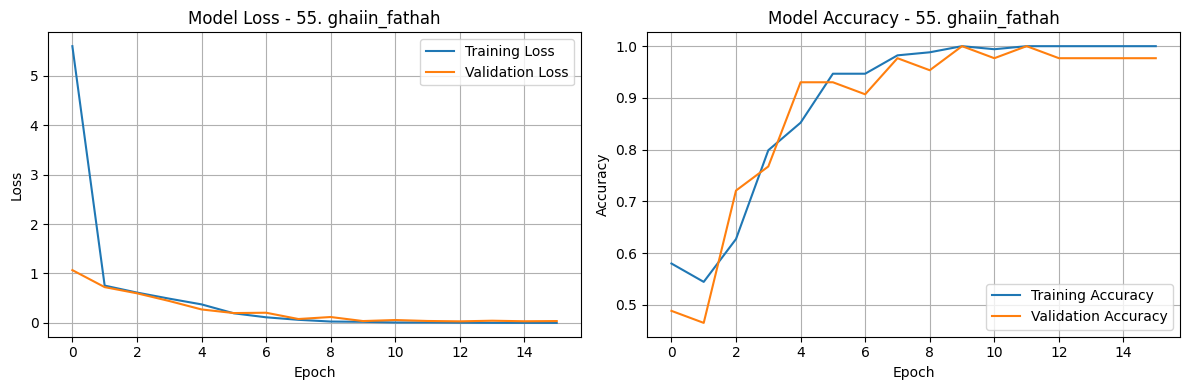

Processing class: 56. ghaiin_kasroh
Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step - accuracy: 0.5788 - loss: 4.8656 - val_accuracy: 0.6047 - val_loss: 0.8078
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - accuracy: 0.5852 - loss: 0.7061 - val_accuracy: 0.6047 - val_loss: 0.8583
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 116ms/step - accuracy: 0.5956 - loss: 0.6433 - val_accuracy: 0.5814 - val_loss: 0.7216
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - accuracy: 0.6699 - loss: 0.5692 - val_accuracy: 0.6512 - val_loss: 0.7542
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.6434 - loss: 0.5640 - val_accuracy: 0.7442 - val_loss: 0.8012
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.6737 - loss: 0.5636 - val_accuracy: 0.6279 - val_loss: 0.9543
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - accuracy: 0.7129 - loss: 0.5133 - val_accuracy: 0.6977 - val_loss: 0.8139
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.7236 - loss: 0.5214 - va

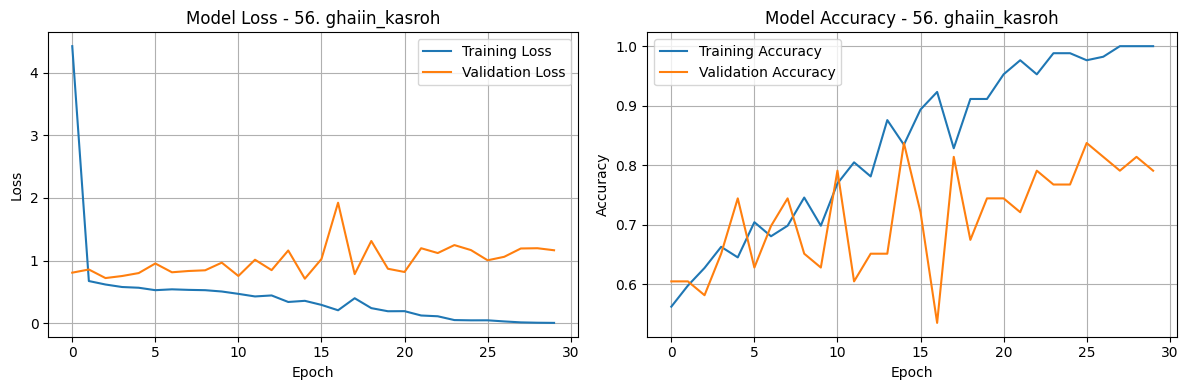

Processing class: 57. ghaiin_dommah
Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 112ms/step - accuracy: 0.4550 - loss: 7.1219 - val_accuracy: 0.4884 - val_loss: 0.7298
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - accuracy: 0.5168 - loss: 0.6908 - val_accuracy: 0.5116 - val_loss: 0.6604
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.5855 - loss: 0.6678 - val_accuracy: 0.6047 - val_loss: 0.6657
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - accuracy: 0.6418 - loss: 0.6380 - val_accuracy: 0.6047 - val_loss: 0.6560
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - accuracy: 0.5343 - loss: 0.6691 - val_accuracy: 0.6047 - val_loss: 0.6541
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.6257 - loss: 0.6221 - val_accuracy: 0.6047 - val_loss: 0.6454
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.5854 - loss: 0.6438 - val_accuracy: 0.5581 - val_loss: 0.6524
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.6376 - loss: 0.6504 - va

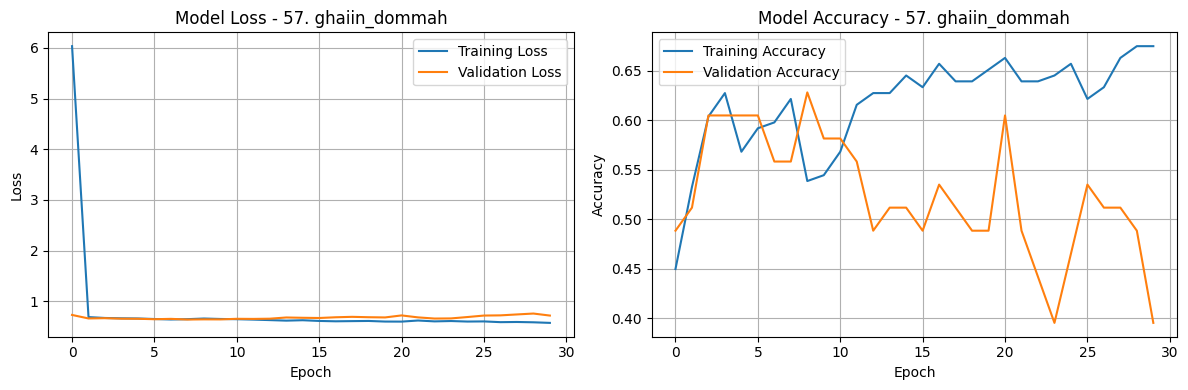

Processing class: 58. fa_fathah
Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 117ms/step - accuracy: 0.4569 - loss: 11.0054 - val_accuracy: 0.4419 - val_loss: 0.7966
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.4914 - loss: 0.7402 - val_accuracy: 0.4651 - val_loss: 0.7139
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - accuracy: 0.6420 - loss: 0.6589 - val_accuracy: 0.4419 - val_loss: 0.7243
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - accuracy: 0.6478 - loss: 0.6196 - val_accuracy: 0.5116 - val_loss: 0.8474
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - accuracy: 0.6713 - loss: 0.6259 - val_accuracy: 0.5814 - val_loss: 0.7437
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - accuracy: 0.7246 - loss: 0.5884 - val_accuracy: 0.5349 - val_loss: 0.7970
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 0.6526 - loss: 0.5978 - val_accuracy: 0.6279 - val_loss: 0.7690
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - accuracy: 0.7218 - loss: 0.5515 - val_ac

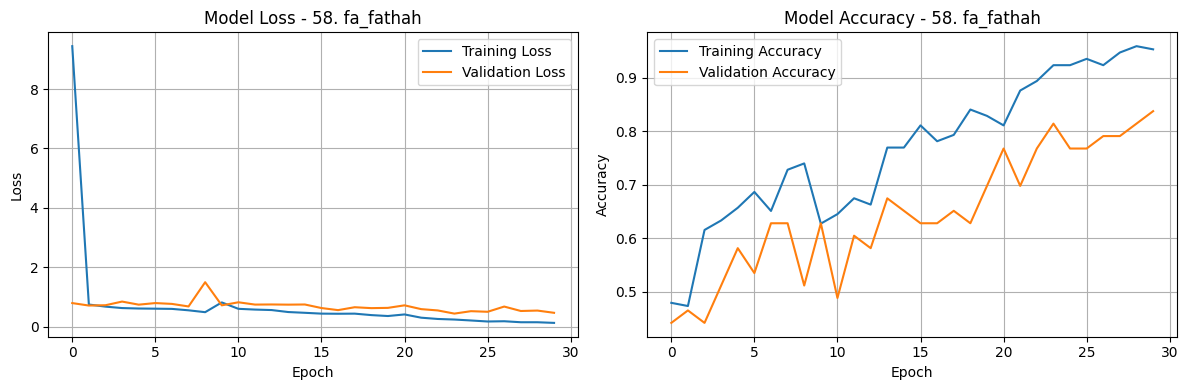

Processing class: 59. fa_kasroh
Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 111ms/step - accuracy: 0.5381 - loss: 6.1812 - val_accuracy: 0.6047 - val_loss: 0.7214
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.5923 - loss: 0.7479 - val_accuracy: 0.5581 - val_loss: 0.6953
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.5605 - loss: 0.6878 - val_accuracy: 0.6512 - val_loss: 0.6528
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - accuracy: 0.6264 - loss: 0.6427 - val_accuracy: 0.6047 - val_loss: 0.6483
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - accuracy: 0.6395 - loss: 0.6104 - val_accuracy: 0.6512 - val_loss: 0.6729
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - accuracy: 0.6766 - loss: 0.5756 - val_accuracy: 0.6744 - val_loss: 0.6483
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - accuracy: 0.5876 - loss: 0.6213 - val_accuracy: 0.6047 - val_loss: 0.6441
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - accuracy: 0.5985 - loss: 0.6155 - val_acc

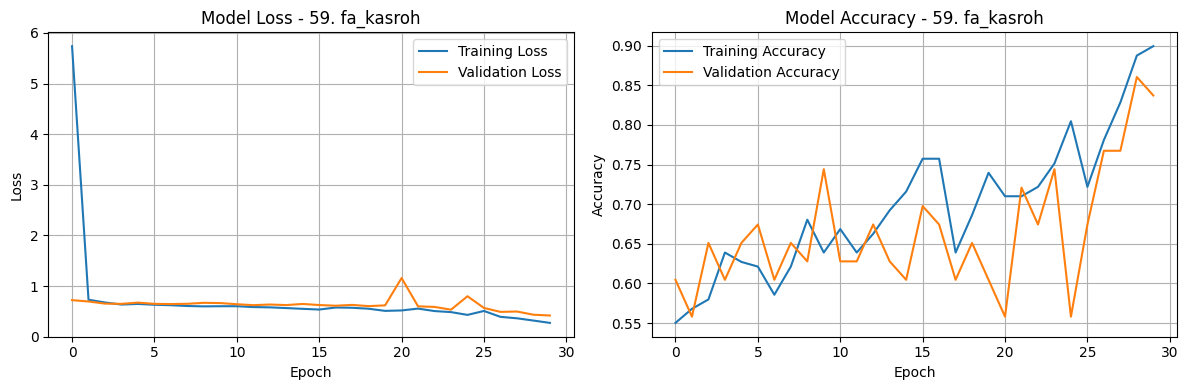

Processing class: 60. fa_dommah
Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 133ms/step - accuracy: 0.4498 - loss: 7.5315 - val_accuracy: 0.5349 - val_loss: 0.7562
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.5490 - loss: 0.7021 - val_accuracy: 0.5814 - val_loss: 0.6503
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.6594 - loss: 0.6375 - val_accuracy: 0.6047 - val_loss: 0.6196
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.6312 - loss: 0.6391 - val_accuracy: 0.6047 - val_loss: 0.6150
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.6166 - loss: 0.5979 - val_accuracy: 0.6512 - val_loss: 0.6020
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.6477 - loss: 0.5993 - val_accuracy: 0.5814 - val_loss: 0.6059
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.6271 - loss: 0.5934 - val_accuracy: 0.6512 - val_loss: 0.6019
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.6114 - loss: 0.6283 - val_acc

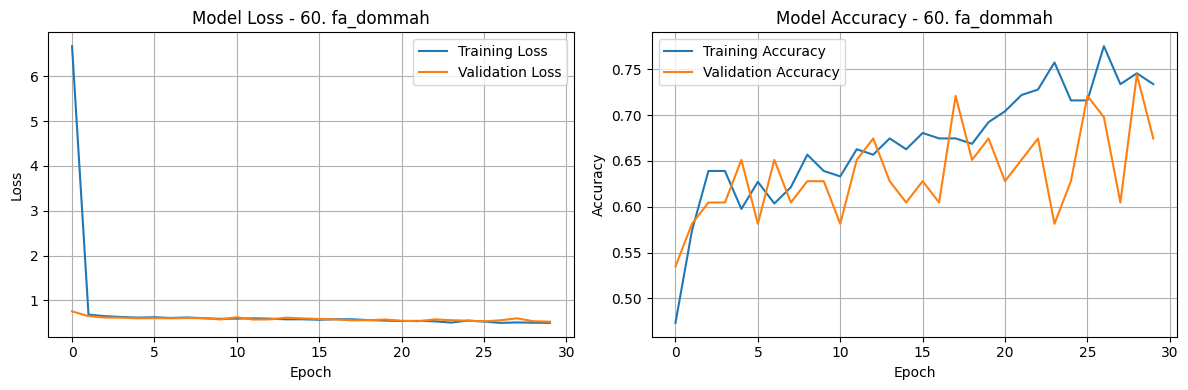

Processing class: 61. qaf_fathah
Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 133ms/step - accuracy: 0.5706 - loss: 11.4916 - val_accuracy: 0.6279 - val_loss: 1.2281
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.5805 - loss: 0.7945 - val_accuracy: 0.5581 - val_loss: 0.6900
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.6407 - loss: 0.6088 - val_accuracy: 0.4884 - val_loss: 0.7430
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - accuracy: 0.6321 - loss: 0.6355 - val_accuracy: 0.7442 - val_loss: 0.6319
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - accuracy: 0.8109 - loss: 0.5355 - val_accuracy: 0.6279 - val_loss: 0.8323
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.6732 - loss: 0.5998 - val_accuracy: 0.6279 - val_loss: 0.5916
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.8377 - loss: 0.4203 - val_accuracy: 0.7442 - val_loss: 0.5703
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.8268 - loss: 0.3932 - val_a

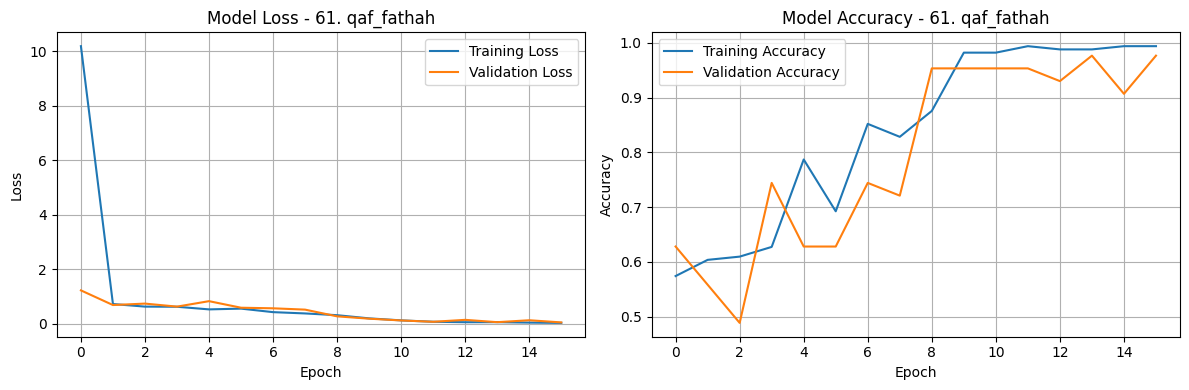

Processing class: 62. qaf_kasroh
Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 135ms/step - accuracy: 0.4992 - loss: 8.3573 - val_accuracy: 0.5814 - val_loss: 2.4246
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 0.6494 - loss: 1.0803 - val_accuracy: 0.4884 - val_loss: 0.7664
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step - accuracy: 0.5445 - loss: 0.6518 - val_accuracy: 0.6047 - val_loss: 0.6746
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 0.6303 - loss: 0.6261 - val_accuracy: 0.6047 - val_loss: 0.7429
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.6540 - loss: 0.6124 - val_accuracy: 0.5814 - val_loss: 0.6842
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.5798 - loss: 0.6219 - val_accuracy: 0.5814 - val_loss: 0.6998
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.5972 - loss: 0.5709 - val_accuracy: 0.6047 - val_loss: 0.7147
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.6316 - loss: 0.5921 - val_a

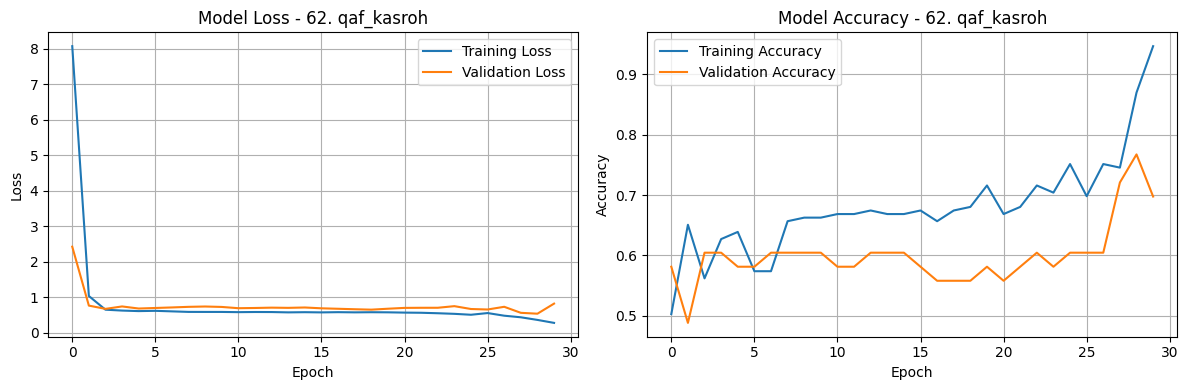

Processing class: 63. qaf_dommah
Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 129ms/step - accuracy: 0.4909 - loss: 8.9807 - val_accuracy: 0.4884 - val_loss: 0.7018
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.4999 - loss: 0.7241 - val_accuracy: 0.5349 - val_loss: 0.8417
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - accuracy: 0.6171 - loss: 0.7574 - val_accuracy: 0.5814 - val_loss: 0.6865
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.5876 - loss: 0.6818 - val_accuracy: 0.5349 - val_loss: 0.6451
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - accuracy: 0.6481 - loss: 0.6283 - val_accuracy: 0.5581 - val_loss: 0.6303
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.6604 - loss: 0.6174 - val_accuracy: 0.4884 - val_loss: 0.6450
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.6828 - loss: 0.5838 - val_accuracy: 0.5349 - val_loss: 0.6645
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.6243 - loss: 0.5758 - val_ac

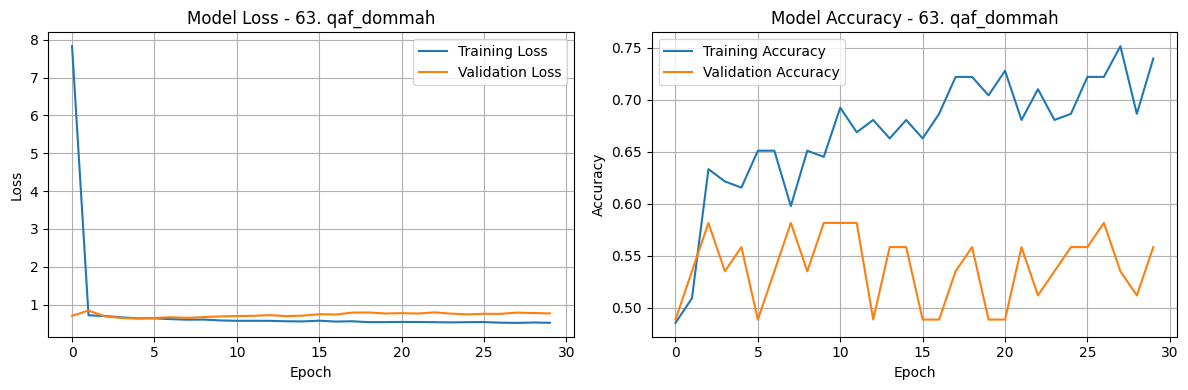

Processing class: 64. kaf_fathah
Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 129ms/step - accuracy: 0.5031 - loss: 6.1803 - val_accuracy: 0.4651 - val_loss: 0.7879
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.5434 - loss: 0.7396 - val_accuracy: 0.6047 - val_loss: 0.6652
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - accuracy: 0.6246 - loss: 0.6351 - val_accuracy: 0.5116 - val_loss: 0.6399
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.6753 - loss: 0.5868 - val_accuracy: 0.6279 - val_loss: 0.5884
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - accuracy: 0.7467 - loss: 0.5773 - val_accuracy: 0.6512 - val_loss: 0.5636
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.6932 - loss: 0.5919 - val_accuracy: 0.6279 - val_loss: 0.5988
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.6768 - loss: 0.5620 - val_accuracy: 0.5349 - val_loss: 0.6561
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - accuracy: 0.7047 - loss: 0.5678 - val_a

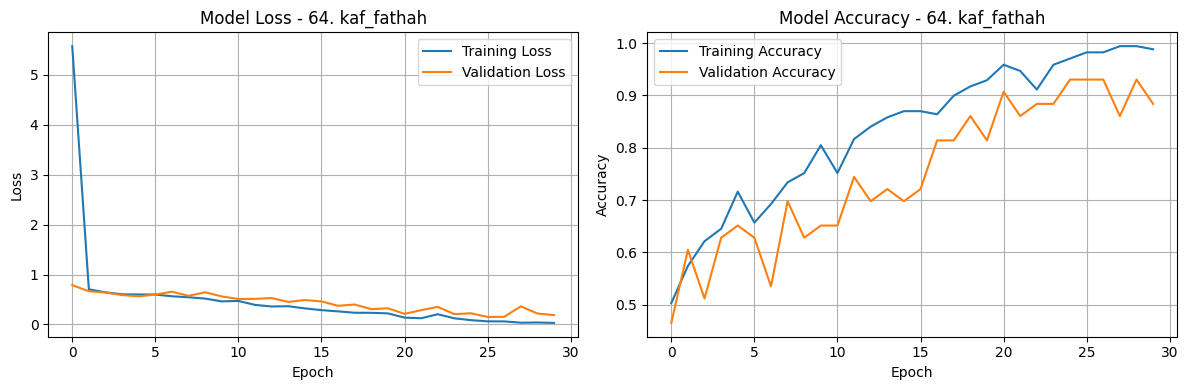

Processing class: 65. kaf_kasroh
Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 123ms/step - accuracy: 0.5096 - loss: 5.2521 - val_accuracy: 0.6047 - val_loss: 0.6990
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.6206 - loss: 0.6302 - val_accuracy: 0.5116 - val_loss: 0.8738
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - accuracy: 0.5049 - loss: 0.7764 - val_accuracy: 0.6047 - val_loss: 0.6750
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - accuracy: 0.6176 - loss: 0.6430 - val_accuracy: 0.5814 - val_loss: 0.6657
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.6857 - loss: 0.5568 - val_accuracy: 0.6047 - val_loss: 0.6364
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.6675 - loss: 0.5881 - val_accuracy: 0.5814 - val_loss: 0.6273
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.6513 - loss: 0.5780 - val_accuracy: 0.5581 - val_loss: 0.6195
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.6577 - loss: 0.5723 - val_a

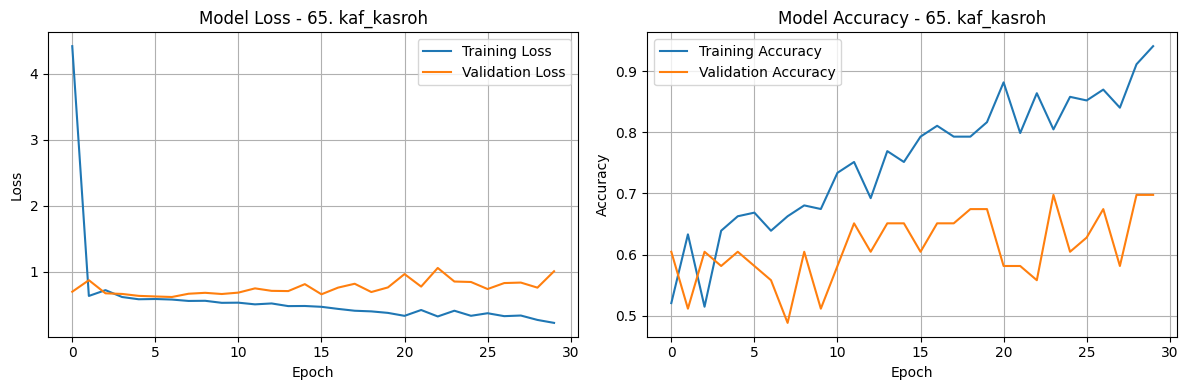

Processing class: 66. kaf_dommah
Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 128ms/step - accuracy: 0.4043 - loss: 8.0104 - val_accuracy: 0.5814 - val_loss: 0.8212
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - accuracy: 0.5741 - loss: 0.7715 - val_accuracy: 0.6047 - val_loss: 0.6633
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.6397 - loss: 0.6154 - val_accuracy: 0.6047 - val_loss: 0.7079
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 0.6508 - loss: 0.6289 - val_accuracy: 0.5814 - val_loss: 0.6494
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.6431 - loss: 0.6140 - val_accuracy: 0.6047 - val_loss: 0.6482
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 0.6448 - loss: 0.5904 - val_accuracy: 0.6047 - val_loss: 0.6651
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.6115 - loss: 0.6095 - val_accuracy: 0.5814 - val_loss: 0.6750
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.6623 - loss: 0.5715 - val_ac

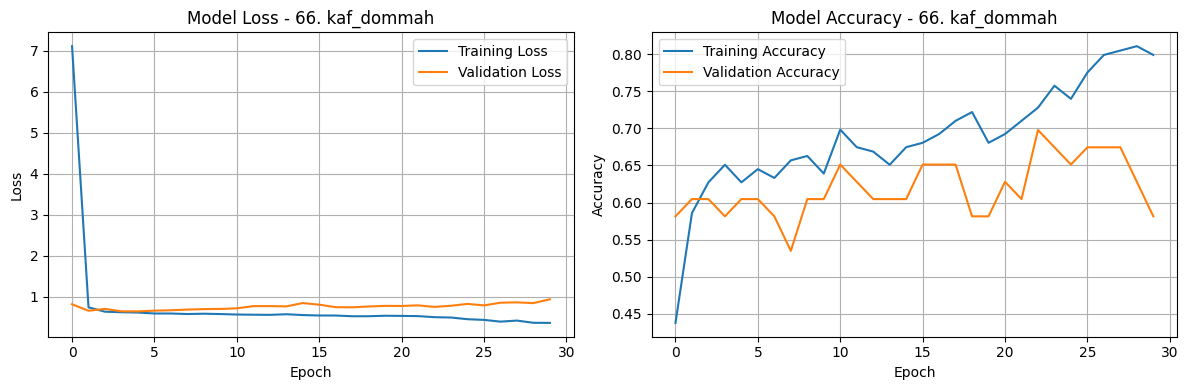

Processing class: 67. lam_fathah
Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 127ms/step - accuracy: 0.4216 - loss: 5.7544 - val_accuracy: 0.5116 - val_loss: 0.7964
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 0.6518 - loss: 0.6237 - val_accuracy: 0.5116 - val_loss: 1.0734
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - accuracy: 0.5822 - loss: 0.8159 - val_accuracy: 0.5581 - val_loss: 0.6895
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 0.6185 - loss: 0.6605 - val_accuracy: 0.6279 - val_loss: 0.6546
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.6866 - loss: 0.5857 - val_accuracy: 0.6744 - val_loss: 0.6646
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.7066 - loss: 0.5736 - val_accuracy: 0.5814 - val_loss: 0.6474
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.6836 - loss: 0.5594 - val_accuracy: 0.6977 - val_loss: 0.6192
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.7285 - loss: 0.5405 - val_a

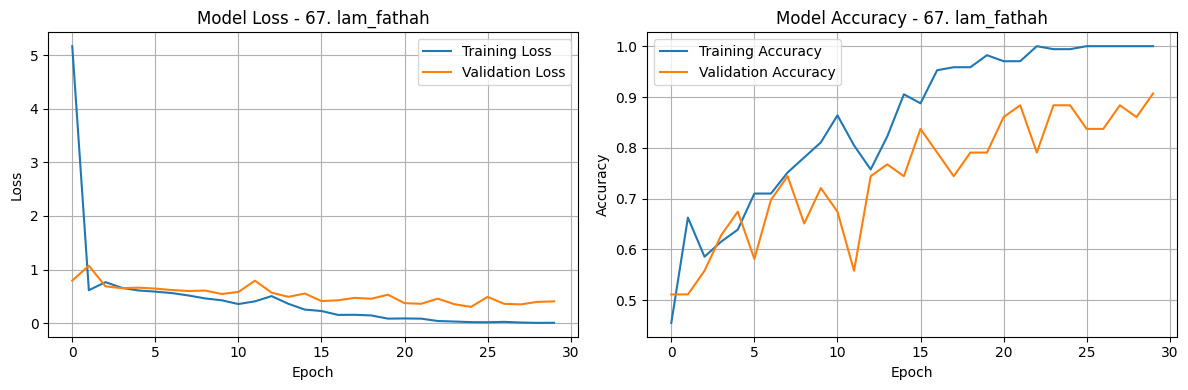

Processing class: 68. lam_kasroh
Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 123ms/step - accuracy: 0.5112 - loss: 4.8868 - val_accuracy: 0.5349 - val_loss: 1.0315
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 0.6318 - loss: 0.7765 - val_accuracy: 0.5349 - val_loss: 0.7220
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - accuracy: 0.6077 - loss: 0.6743 - val_accuracy: 0.5581 - val_loss: 0.6864
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - accuracy: 0.6377 - loss: 0.6193 - val_accuracy: 0.5349 - val_loss: 0.6899
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.6194 - loss: 0.6457 - val_accuracy: 0.5349 - val_loss: 0.7101
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.6012 - loss: 0.6231 - val_accuracy: 0.5581 - val_loss: 0.6816
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.6665 - loss: 0.5765 - val_accuracy: 0.5814 - val_loss: 0.7016
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.7008 - loss: 0.5690 - val_ac

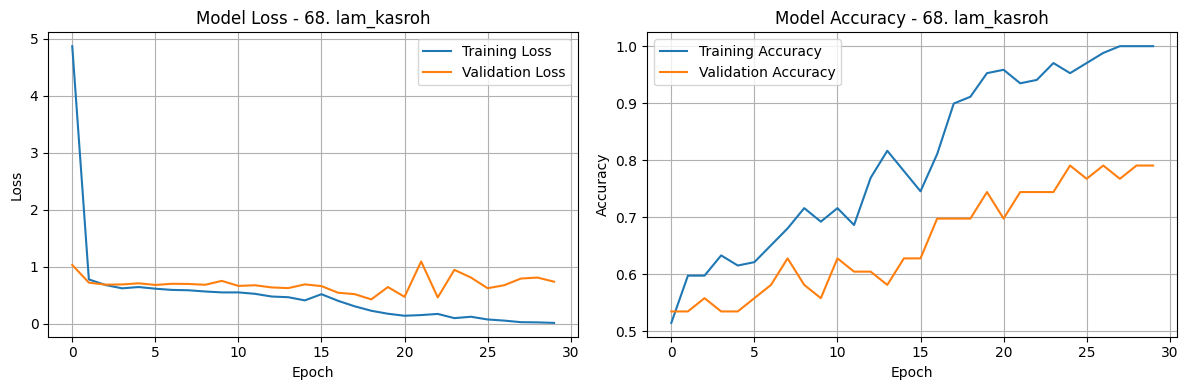

Processing class: 69. lam_dommah
Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 122ms/step - accuracy: 0.5161 - loss: 6.6789 - val_accuracy: 0.5814 - val_loss: 0.8666
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - accuracy: 0.6190 - loss: 0.7484 - val_accuracy: 0.5581 - val_loss: 0.6749
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - accuracy: 0.5226 - loss: 0.7101 - val_accuracy: 0.5349 - val_loss: 0.7510
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.5718 - loss: 0.7326 - val_accuracy: 0.5814 - val_loss: 0.6629
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.6302 - loss: 0.6522 - val_accuracy: 0.5581 - val_loss: 0.6182
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.6546 - loss: 0.5945 - val_accuracy: 0.6279 - val_loss: 0.6099
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - accuracy: 0.6566 - loss: 0.5961 - val_accuracy: 0.5814 - val_loss: 0.6008
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.6332 - loss: 0.6118 - val_ac

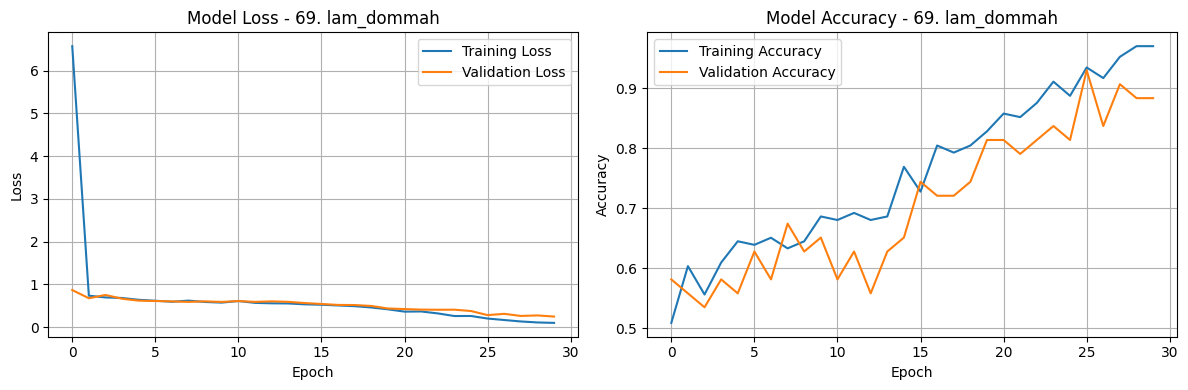

Processing class: 70. mim_fathah
Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 136ms/step - accuracy: 0.5634 - loss: 12.8668 - val_accuracy: 0.5349 - val_loss: 0.6941
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.6082 - loss: 0.6843 - val_accuracy: 0.4884 - val_loss: 0.7078
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - accuracy: 0.6481 - loss: 0.6535 - val_accuracy: 0.5581 - val_loss: 0.7184
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.6898 - loss: 0.6223 - val_accuracy: 0.6047 - val_loss: 0.6750
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.6729 - loss: 0.6177 - val_accuracy: 0.7442 - val_loss: 0.6450
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.6462 - loss: 0.6074 - val_accuracy: 0.5349 - val_loss: 0.6440
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.6925 - loss: 0.5680 - val_accuracy: 0.7209 - val_loss: 0.6505
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.7501 - loss: 0.5270 - val_a

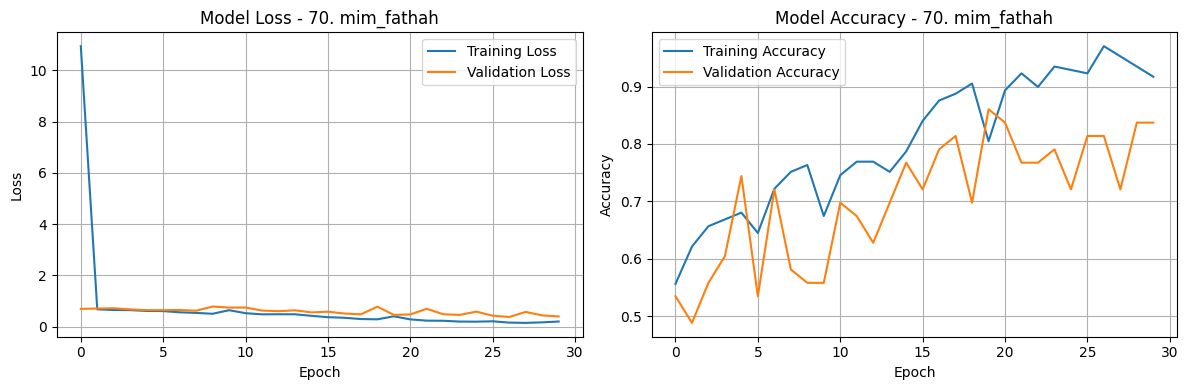

Processing class: 71. mim_kasroh
Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 124ms/step - accuracy: 0.4377 - loss: 9.8573 - val_accuracy: 0.5116 - val_loss: 1.1777
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 0.5404 - loss: 0.8982 - val_accuracy: 0.6512 - val_loss: 0.7124
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - accuracy: 0.6543 - loss: 0.6358 - val_accuracy: 0.5349 - val_loss: 0.7190
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.6347 - loss: 0.5844 - val_accuracy: 0.5349 - val_loss: 0.7230
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - accuracy: 0.6343 - loss: 0.6244 - val_accuracy: 0.6512 - val_loss: 0.6711
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.6904 - loss: 0.5582 - val_accuracy: 0.6279 - val_loss: 0.6974
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 0.7051 - loss: 0.5533 - val_accuracy: 0.6744 - val_loss: 0.6319
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 0.6761 - loss: 0.5686 - val_a

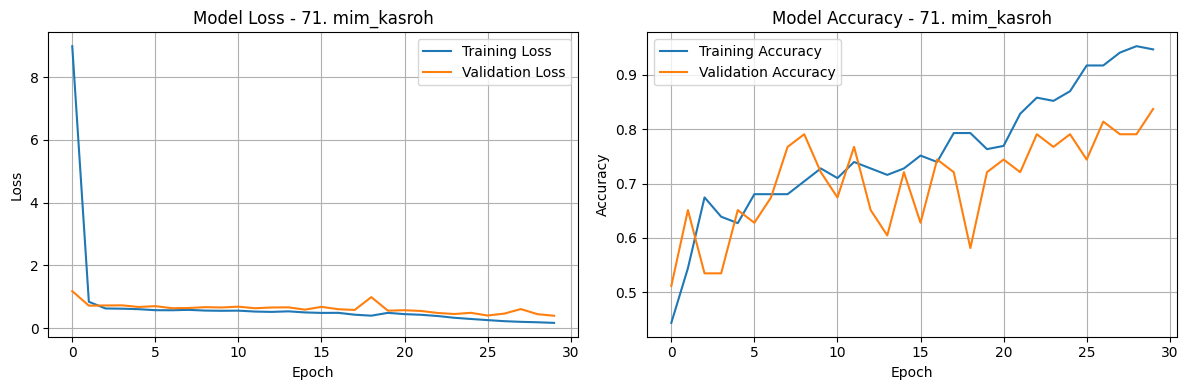

Processing class: 72. mim_dommah
Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 108ms/step - accuracy: 0.5489 - loss: 4.4135 - val_accuracy: 0.4884 - val_loss: 1.2960
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 0.5568 - loss: 0.8664 - val_accuracy: 0.5814 - val_loss: 0.6436
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.5907 - loss: 0.6575 - val_accuracy: 0.5814 - val_loss: 0.6111
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.6237 - loss: 0.6218 - val_accuracy: 0.6512 - val_loss: 0.6165
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.6264 - loss: 0.5992 - val_accuracy: 0.6977 - val_loss: 0.5930
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - accuracy: 0.6475 - loss: 0.5990 - val_accuracy: 0.5814 - val_loss: 0.6212
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.7086 - loss: 0.5905 - val_accuracy: 0.5814 - val_loss: 0.6518
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.6471 - loss: 0.6022 - val_ac

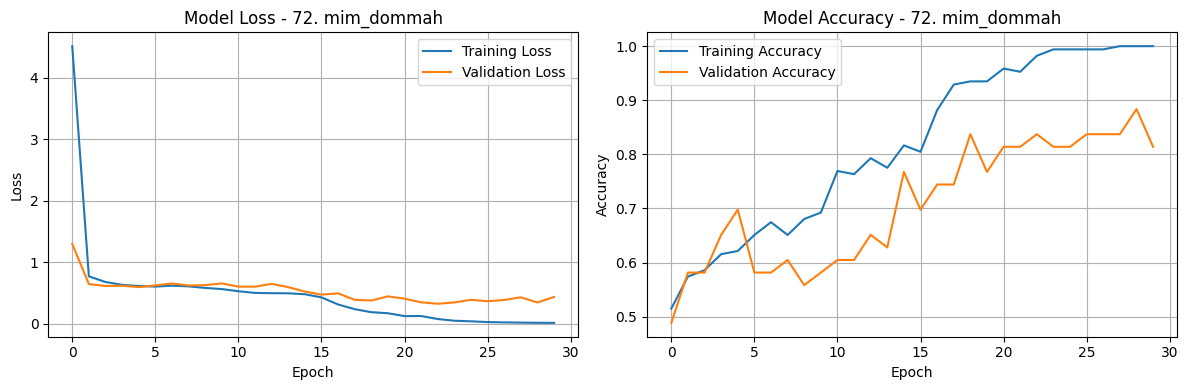

Processing class: 73. nun_fathah
Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 139ms/step - accuracy: 0.5788 - loss: 7.2029 - val_accuracy: 0.4884 - val_loss: 0.6921
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.6034 - loss: 0.6862 - val_accuracy: 0.5349 - val_loss: 0.6864
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - accuracy: 0.5136 - loss: 0.6764 - val_accuracy: 0.5116 - val_loss: 0.6817
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.5957 - loss: 0.6640 - val_accuracy: 0.5581 - val_loss: 0.6752
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.6554 - loss: 0.6458 - val_accuracy: 0.5581 - val_loss: 0.6878
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - accuracy: 0.6190 - loss: 0.6337 - val_accuracy: 0.5581 - val_loss: 0.6877
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.6994 - loss: 0.6015 - val_accuracy: 0.5814 - val_loss: 0.6562
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.6367 - loss: 0.6102 - val_a

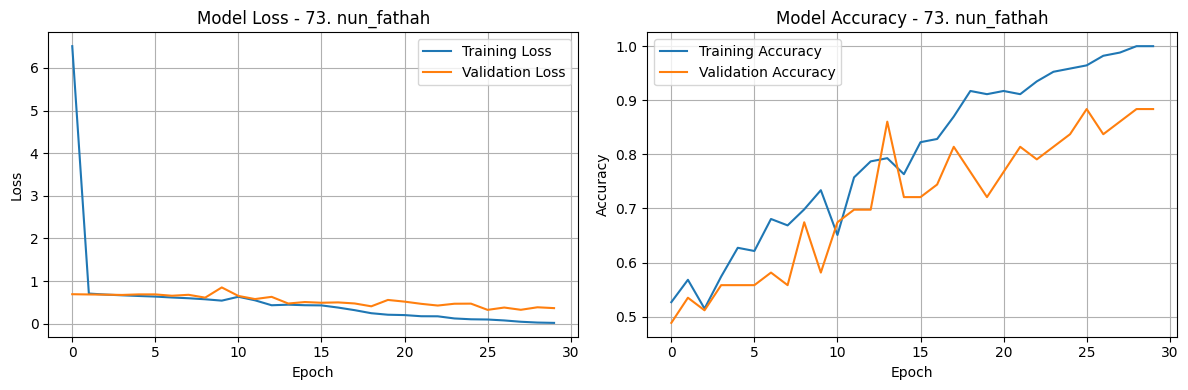

Processing class: 74. nun_kasroh
Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 134ms/step - accuracy: 0.5004 - loss: 12.2909 - val_accuracy: 0.5581 - val_loss: 0.6851
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.5925 - loss: 0.7044 - val_accuracy: 0.5581 - val_loss: 0.7017
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - accuracy: 0.6647 - loss: 0.6309 - val_accuracy: 0.5814 - val_loss: 0.6961
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.6354 - loss: 0.6613 - val_accuracy: 0.6047 - val_loss: 0.6266
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.6189 - loss: 0.6035 - val_accuracy: 0.5581 - val_loss: 0.6834
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.7233 - loss: 0.5670 - val_accuracy: 0.6279 - val_loss: 0.6881
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.6696 - loss: 0.5550 - val_accuracy: 0.6047 - val_loss: 0.6377
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - accuracy: 0.6439 - loss: 0.5905 - val_

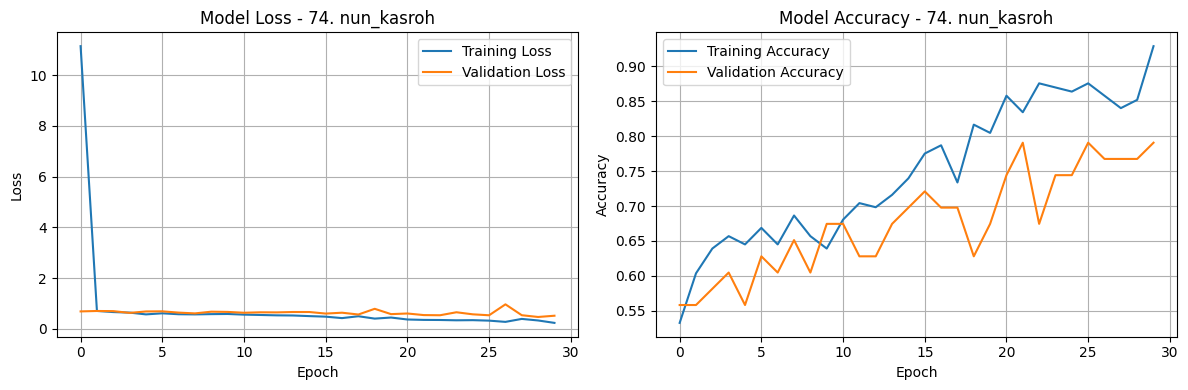

Processing class: 75. nun_dommah
Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 122ms/step - accuracy: 0.4713 - loss: 12.0230 - val_accuracy: 0.5581 - val_loss: 0.7063
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - accuracy: 0.5986 - loss: 0.6738 - val_accuracy: 0.5814 - val_loss: 0.6614
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.6028 - loss: 0.6582 - val_accuracy: 0.6047 - val_loss: 0.6463
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.6355 - loss: 0.6430 - val_accuracy: 0.6047 - val_loss: 0.6235
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - accuracy: 0.6863 - loss: 0.5909 - val_accuracy: 0.6279 - val_loss: 0.6118
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.6311 - loss: 0.6107 - val_accuracy: 0.6279 - val_loss: 0.6190
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.6508 - loss: 0.5960 - val_accuracy: 0.5581 - val_loss: 0.6057
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.6718 - loss: 0.5707 - val_a

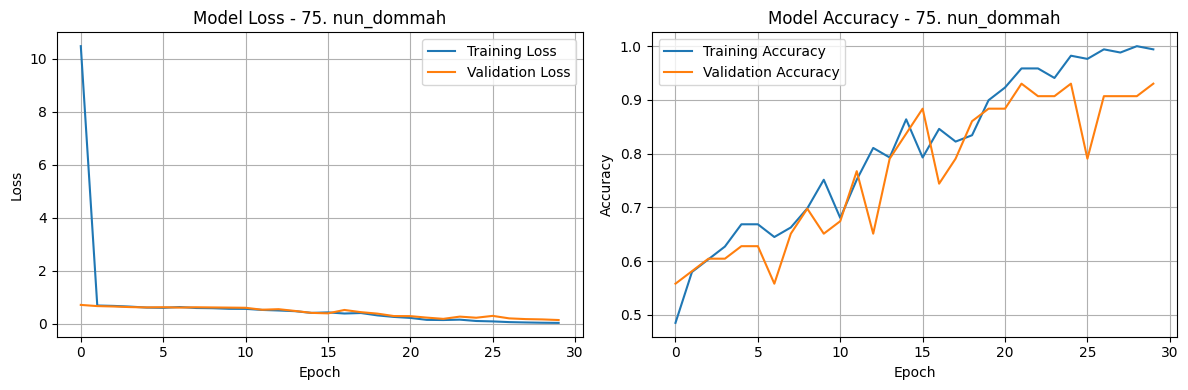

Processing class: 76. Ha_fathah
Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 127ms/step - accuracy: 0.5107 - loss: 6.0269 - val_accuracy: 0.5116 - val_loss: 1.1073
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - accuracy: 0.5741 - loss: 0.9276 - val_accuracy: 0.5814 - val_loss: 1.2959
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.5032 - loss: 1.1625 - val_accuracy: 0.4884 - val_loss: 0.7154
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.5823 - loss: 0.6732 - val_accuracy: 0.5581 - val_loss: 0.6691
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.6260 - loss: 0.6136 - val_accuracy: 0.6512 - val_loss: 0.6367
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.7669 - loss: 0.5668 - val_accuracy: 0.7209 - val_loss: 0.5787
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 0.7050 - loss: 0.5525 - val_accuracy: 0.6512 - val_loss: 0.6268
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.8084 - loss: 0.4672 - val_acc

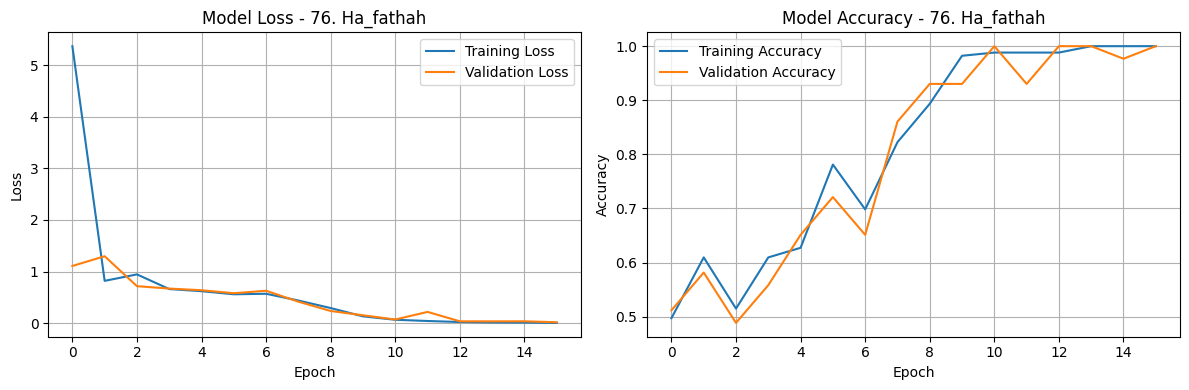

Processing class: 77. Ha_kasroh
Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step - accuracy: 0.5235 - loss: 12.7666 - val_accuracy: 0.4884 - val_loss: 0.6986
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - accuracy: 0.5022 - loss: 0.6767 - val_accuracy: 0.4884 - val_loss: 0.7014
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - accuracy: 0.5136 - loss: 0.6669 - val_accuracy: 0.4884 - val_loss: 0.7312
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.5409 - loss: 0.6609 - val_accuracy: 0.4884 - val_loss: 0.7417
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - accuracy: 0.4893 - loss: 0.6635 - val_accuracy: 0.5581 - val_loss: 0.7003
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.6715 - loss: 0.6618 - val_accuracy: 0.5581 - val_loss: 0.7444
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.6791 - loss: 0.6562 - val_accuracy: 0.5581 - val_loss: 0.7544
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.6545 - loss: 0.6456 - val_ac

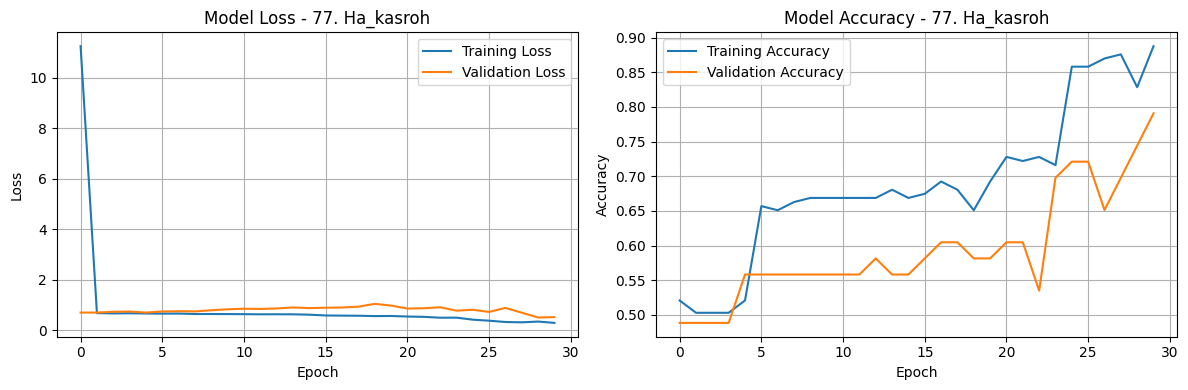

Processing class: 78. Ha_dommah
Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 129ms/step - accuracy: 0.4654 - loss: 3.0062 - val_accuracy: 0.5581 - val_loss: 0.7510
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - accuracy: 0.5681 - loss: 0.7286 - val_accuracy: 0.5116 - val_loss: 0.6729
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.5884 - loss: 0.6860 - val_accuracy: 0.5814 - val_loss: 0.6441
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - accuracy: 0.6119 - loss: 0.6340 - val_accuracy: 0.6047 - val_loss: 0.6514
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.6548 - loss: 0.6061 - val_accuracy: 0.6279 - val_loss: 0.6472
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.6490 - loss: 0.6085 - val_accuracy: 0.5349 - val_loss: 0.6402
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.6564 - loss: 0.6012 - val_accuracy: 0.4884 - val_loss: 0.6628
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.5768 - loss: 0.5797 - val_acc

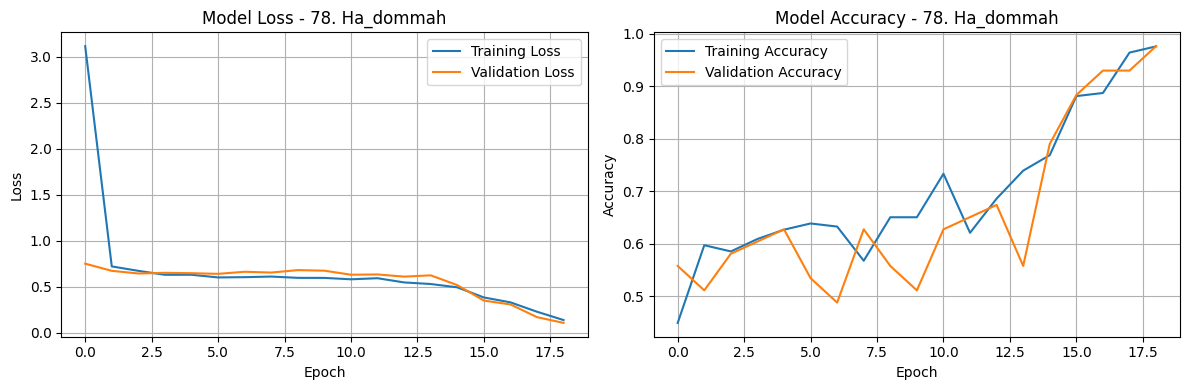

Processing class: 79. waw_fathah
Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 129ms/step - accuracy: 0.4642 - loss: 5.7716 - val_accuracy: 0.5116 - val_loss: 0.8666
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - accuracy: 0.5550 - loss: 0.7648 - val_accuracy: 0.5116 - val_loss: 0.7195
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - accuracy: 0.5589 - loss: 0.6975 - val_accuracy: 0.5581 - val_loss: 0.6879
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.6243 - loss: 0.6604 - val_accuracy: 0.6512 - val_loss: 0.6921
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.6530 - loss: 0.6469 - val_accuracy: 0.6744 - val_loss: 0.6741
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.6889 - loss: 0.6121 - val_accuracy: 0.6279 - val_loss: 0.6848
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.7276 - loss: 0.5633 - val_accuracy: 0.4884 - val_loss: 1.3231
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - accuracy: 0.6352 - loss: 0.8169 - val_ac

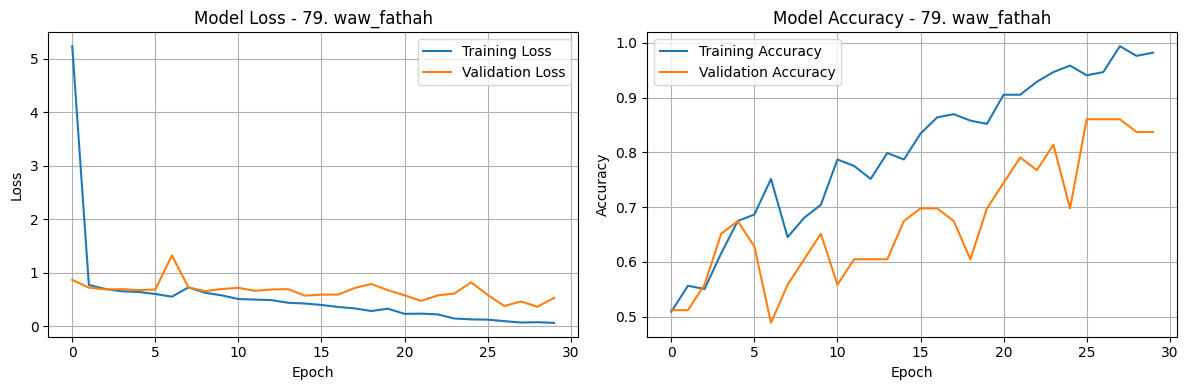

Processing class: 80. waw_kasroh
Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 124ms/step - accuracy: 0.4921 - loss: 6.1174 - val_accuracy: 0.6279 - val_loss: 0.6619
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - accuracy: 0.5617 - loss: 0.7443 - val_accuracy: 0.6047 - val_loss: 0.6191
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.6333 - loss: 0.6132 - val_accuracy: 0.6047 - val_loss: 0.6070
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.6747 - loss: 0.5592 - val_accuracy: 0.5814 - val_loss: 0.6213
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.6826 - loss: 0.5659 - val_accuracy: 0.6047 - val_loss: 0.6323
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 0.6158 - loss: 0.5955 - val_accuracy: 0.6279 - val_loss: 0.6479
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.6521 - loss: 0.6059 - val_accuracy: 0.6047 - val_loss: 0.8862
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.6577 - loss: 0.7346 - val_a

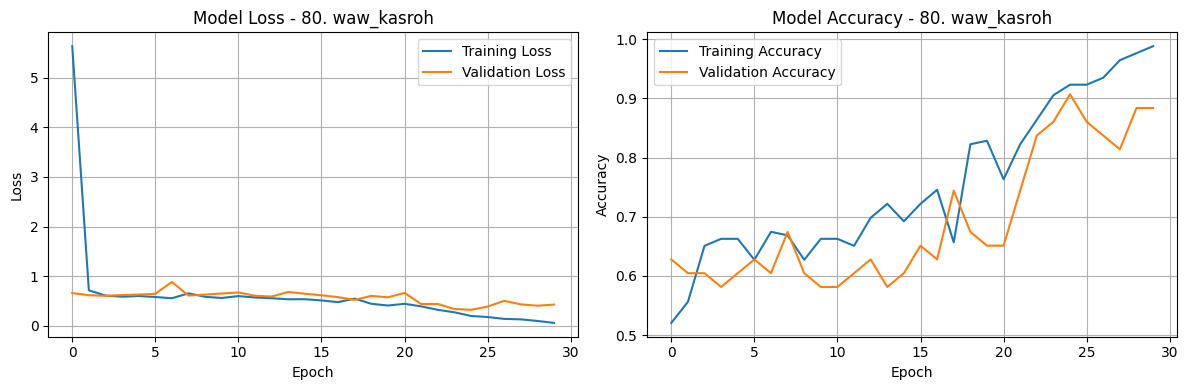

Processing class: 81. waw_dommah
Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 129ms/step - accuracy: 0.5093 - loss: 10.4523 - val_accuracy: 0.5814 - val_loss: 0.6825
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.5099 - loss: 0.7367 - val_accuracy: 0.5581 - val_loss: 0.6845
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - accuracy: 0.5732 - loss: 0.6543 - val_accuracy: 0.5814 - val_loss: 0.6698
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.6591 - loss: 0.6094 - val_accuracy: 0.5349 - val_loss: 0.6750
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 0.6383 - loss: 0.6352 - val_accuracy: 0.5814 - val_loss: 0.6580
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.6856 - loss: 0.5999 - val_accuracy: 0.6047 - val_loss: 0.6531
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.5877 - loss: 0.6384 - val_accuracy: 0.6047 - val_loss: 0.6431
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - accuracy: 0.6079 - loss: 0.6123 - val_a

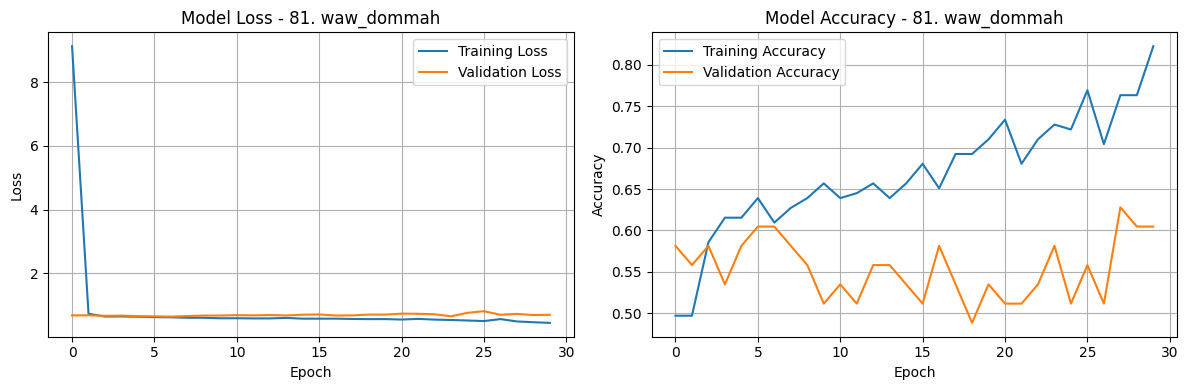

Processing class: 82. ya_fathah
Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 134ms/step - accuracy: 0.4216 - loss: 6.1673 - val_accuracy: 0.3953 - val_loss: 0.7281
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.5936 - loss: 0.6636 - val_accuracy: 0.4651 - val_loss: 0.7297
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - accuracy: 0.5675 - loss: 0.6895 - val_accuracy: 0.6279 - val_loss: 0.6634
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - accuracy: 0.7102 - loss: 0.5899 - val_accuracy: 0.5814 - val_loss: 0.7675
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.6608 - loss: 0.5956 - val_accuracy: 0.6512 - val_loss: 0.6241
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.7142 - loss: 0.5594 - val_accuracy: 0.6512 - val_loss: 0.5749
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.7255 - loss: 0.4920 - val_accuracy: 0.7209 - val_loss: 0.5317
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.8428 - loss: 0.3860 - val_ac

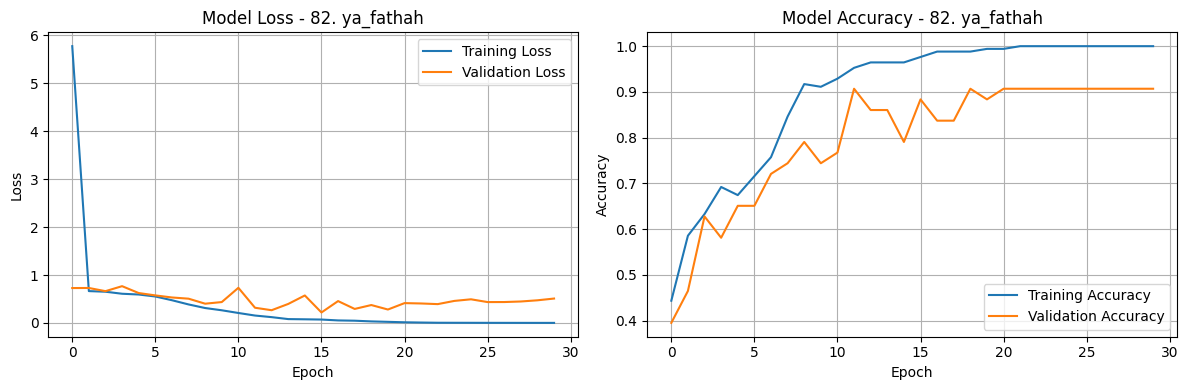

Processing class: 83. ya_kasroh
Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 125ms/step - accuracy: 0.5156 - loss: 9.6041 - val_accuracy: 0.5349 - val_loss: 0.6926
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.4898 - loss: 0.7177 - val_accuracy: 0.5116 - val_loss: 0.7625
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step - accuracy: 0.6407 - loss: 0.6289 - val_accuracy: 0.5814 - val_loss: 0.7540
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.6530 - loss: 0.5804 - val_accuracy: 0.6512 - val_loss: 0.6604
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.6115 - loss: 0.6505 - val_accuracy: 0.6047 - val_loss: 0.6534
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.6774 - loss: 0.5765 - val_accuracy: 0.5814 - val_loss: 0.6901
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.6770 - loss: 0.5778 - val_accuracy: 0.6279 - val_loss: 0.6598
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.6511 - loss: 0.5709 - val_ac

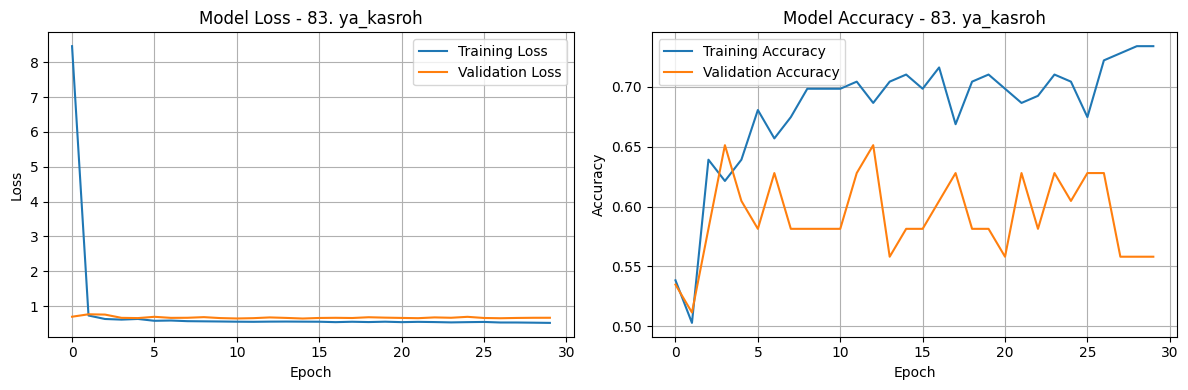

Processing class: 84. ya_dommah
Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 133ms/step - accuracy: 0.4826 - loss: 10.7110 - val_accuracy: 0.5581 - val_loss: 0.7359
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.5484 - loss: 0.6982 - val_accuracy: 0.5349 - val_loss: 0.7334
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - accuracy: 0.5653 - loss: 0.6816 - val_accuracy: 0.4884 - val_loss: 0.7572
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.5281 - loss: 0.6696 - val_accuracy: 0.6047 - val_loss: 0.7295
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.6444 - loss: 0.6420 - val_accuracy: 0.5349 - val_loss: 0.7915
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 0.5583 - loss: 0.6543 - val_accuracy: 0.5116 - val_loss: 0.7704
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.6861 - loss: 0.6167 - val_accuracy: 0.4884 - val_loss: 0.8283
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.7130 - loss: 0.5798 - val_ac

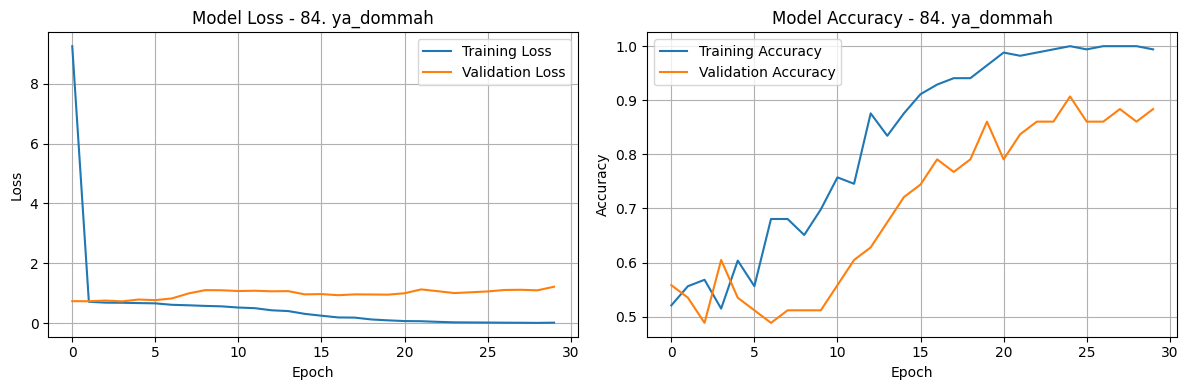

In [18]:
# Array untuk menyimpan metrik pelatihan
training_history = []

for subdir in subdirectories:
    # Skip jika folder adalah folder data salah
    if subdir in ["alif_fathah_salah", "selain_alif_fathah_salah"]:
        continue
        
    print(f"Processing class: {subdir}")
    subdir_path = os.path.join(INPUT_DIR, subdir)
    
    # Load dataset untuk kelas ini
    X = []
    y = []
    wav_files = [file for file in os.listdir(subdir_path) if file.endswith('.wav')]
    
    for wav_file in wav_files:
        file_path = os.path.join(subdir_path, wav_file)
        spectrogram = load_and_extract_spectrogram(file_path)
        X.append(spectrogram)
        y.append(1)  # Label 1 untuk kelas positif (suara benar)

    # Tambahkan data negatif dari folder yang sesuai
    if subdir == "01. alif_fathah":
        wrong_dir = os.path.join(INPUT_DIR, "07. ta_fathah")
    elif subdir == "02. alif_kasroh":
        wrong_dir = os.path.join(INPUT_DIR, "08. ta_kasroh")
    elif subdir == "03. alif_dhomah":
        wrong_dir = os.path.join(INPUT_DIR, "09. ta_dommah")
    else:
        if subdir.endswith('fathah'):
            wrong_dir = os.path.join(INPUT_DIR, "01. alif_fathah")
        elif subdir.endswith('kasroh'):
            wrong_dir = os.path.join(INPUT_DIR, "02. alif_kasroh") 
        elif subdir.endswith('dommah'):
            wrong_dir = os.path.join(INPUT_DIR, "03. alif_dommah")
        
    if os.path.exists(wrong_dir):
        wrong_wav_files = [file for file in os.listdir(wrong_dir) if file.endswith('.wav')]
        for wav_file in wrong_wav_files:
            file_path = os.path.join(wrong_dir, wav_file)
            spectrogram = load_and_extract_spectrogram(file_path)
            X.append(spectrogram)
            y.append(0)  # Label 0 untuk kelas negatif (suara salah)

    # Konversi ke numpy array
    X = np.array(X)
    y = np.array(y)

    # Split dataset menjadi train dan test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

    # Tambahkan dimensi ekstra untuk CNN
    X_train = X_train[..., np.newaxis]
    X_test = X_test[..., np.newaxis]

    # Definisikan model CNN untuk klasifikasi biner
    model = models.Sequential([
        Input(shape=(X_train.shape[1], X_train.shape[2], 1)),  # Gunakan Input secara eksplisit
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(1, activation='sigmoid')  # Output untuk klasifikasi biner
    ])

    # Kompilasi model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Inisiasi callback CustomEarlyStopping
    custom_early_stopping = CustomEarlyStopping(val_loss_threshold=0.15, val_accuracy_threshold=0.96, patience=3, min_epochs=15)

    # Latih model dan simpan history
    history = model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test), callbacks=[custom_early_stopping])

    # Simpan model ke dalam direktori 'model'
    model.save(os.path.join(MODEL_DIR, f'model_{subdir}.keras'))

    # Evaluasi model
    test_loss, test_acc = model.evaluate(X_test, y_test)
    print(f"Test accuracy for {subdir}: {test_acc * 100:.2f}%")
    
    # Get predictions for test set
    test_predictions = model.predict(X_test)
    test_pred_classes = (test_predictions > 0.5).astype(int)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, test_pred_classes)
    precision = precision_score(y_test, test_pred_classes)
    recall = recall_score(y_test, test_pred_classes)
    f1 = f1_score(y_test, test_pred_classes)
    
    # Simpan history pelatihan dan metrik evaluasi
    training_history.append({
        'class': subdir,
        'history': history.history,
        'test_accuracy': test_acc,
        'test_loss': test_loss,
        'predictions': test_predictions,
        'precision': precision,
        'recall': recall, 
        'f1_score': f1
    })

    # Plot training history untuk loss dan accuracy
    plt.figure(figsize=(12, 4))

    # Plot training & validation loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Model Loss - {subdir}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    # Plot training & validation accuracy 
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Model Accuracy - {subdir}')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()





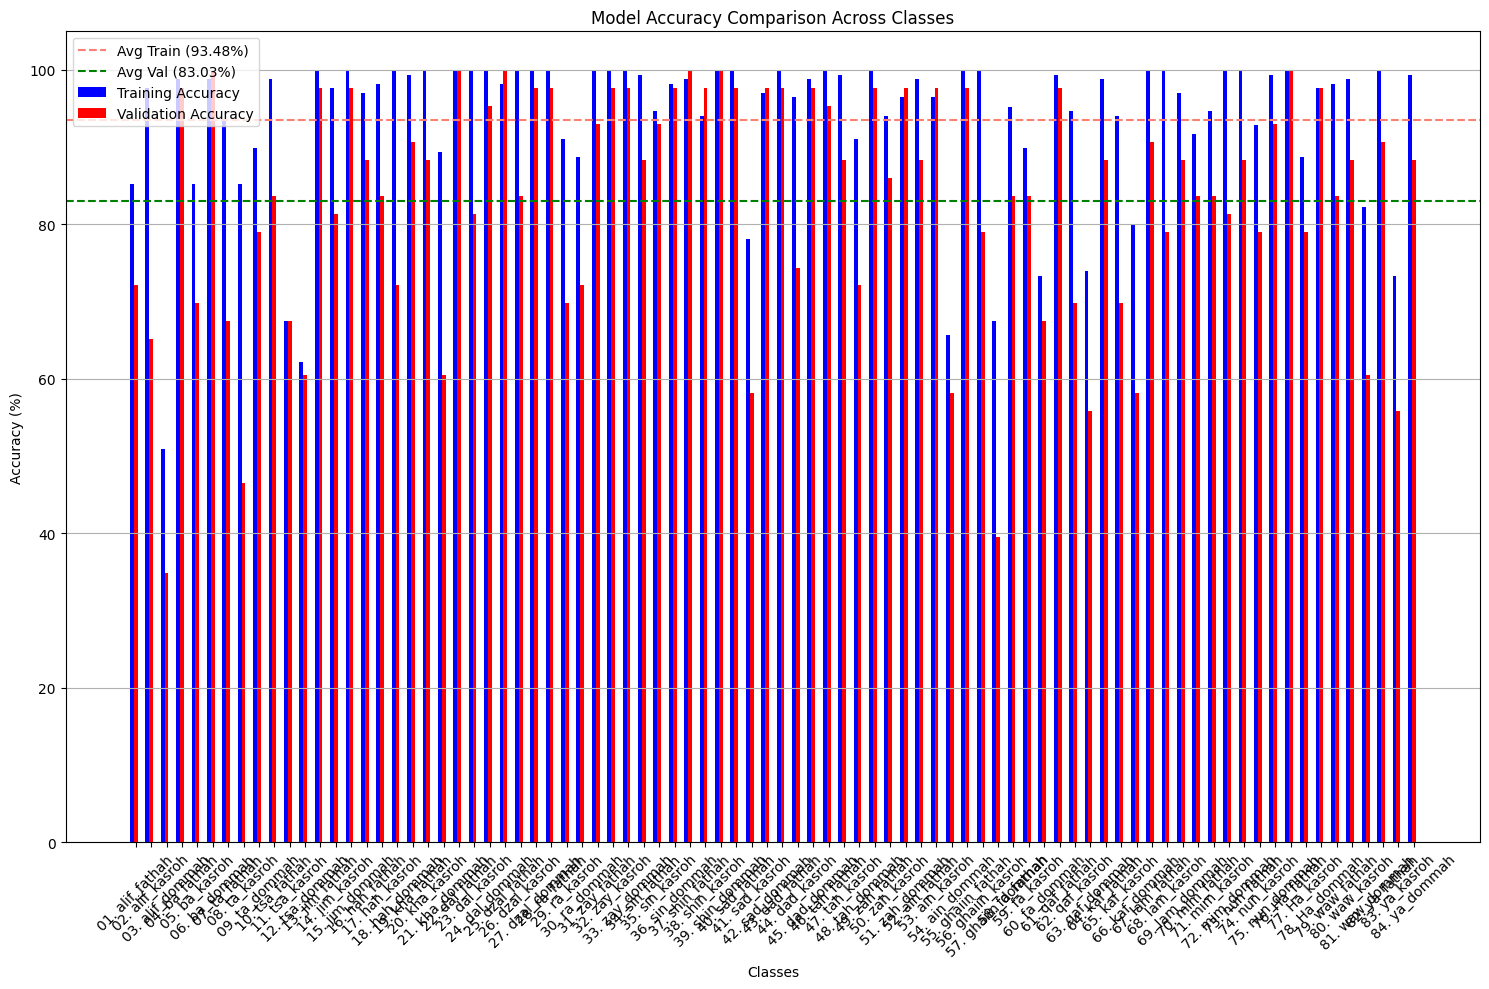


Test Accuracy Summary:
01. alif_fathah: 72.09%
02. alif_kasroh: 65.12%
03. alif_dommah: 34.88%
04. ba_fathah: 97.67%
05. ba_kasroh: 69.77%
06. ba_dommah: 100.00%
07. ta_fathah: 67.44%
08. ta_kasroh: 46.51%
09. ta_dommah: 79.07%
10. tsa_fathah: 83.72%
11. tsa_kasroh: 67.44%
12. tsa_dommah: 60.47%
13. jim_fathah: 97.67%
14. jim_kasroh: 81.40%
15. jim_dommah: 97.67%
16. hah_fathah: 88.37%
17. hah_kasroh: 83.72%
18. hah_dommah: 72.09%
19. kha_fathah: 90.70%
20. kha_kasroh: 88.37%
21. kha_dommah: 60.47%
22. dal_fathah: 100.00%
23. dal_kasroh: 81.40%
24. dal_dommah: 95.35%
25. dzal_fathah: 100.00%
26. dzal_kasroh: 83.72%
27. dzal_dommah: 97.67%
28. ra_fathah: 97.67%
29. ra_kasroh: 69.77%
30. ra_dommah: 72.09%
31. zay_fathah: 93.02%
32. zay_kasroh: 97.67%
33. zay_dommah: 97.67%
34. sin_fathah: 88.37%
35. sin_kasroh: 93.02%
36. sin_dommah: 97.67%
37. shin_fathah: 100.00%
38. shin_kasroh: 97.67%
39. shin_dommah: 100.00%
40. sad_fathah: 97.67%
41. sad_kasroh: 58.14%
42. sad_dommah: 97.67%
43. d

In [32]:
# Plotting hasil pelatihan sebagai bar chart
plt.figure(figsize=(15, 10))

# Persiapkan data untuk plotting
classes = [item['class'] for item in training_history]
test_accuracies = [item['test_accuracy']*100 for item in training_history]
train_accuracies = [item['history']['accuracy'][-1]*100 for item in training_history]
val_accuracies = [item['history']['val_accuracy'][-1]*100 for item in training_history]

# Calculate averages
avg_test = np.mean(test_accuracies)
avg_train = np.mean(train_accuracies)
avg_val = np.mean(val_accuracies)

# Plot accuracies as grouped bar chart
x = np.arange(len(classes))
width = 0.25

plt.bar(x - width, train_accuracies, width, label='Training Accuracy', color='blue')
plt.bar(x, val_accuracies, width, label='Validation Accuracy', color='red')
# plt.bar(x + width, test_accuracies, width, label='Test Accuracy', color='salmon')

# Add average lines
plt.axhline(y=avg_train, color='salmon', linestyle='--', label=f'Avg Train ({avg_train:.2f}%)')
plt.axhline(y=avg_val, color='green', linestyle='--', label=f'Avg Val ({avg_val:.2f}%)')
# plt.axhline(y=avg_test, color='red', linestyle='--', label=f'Avg Test ({avg_test:.2f}%)')

plt.xlabel('Classes')
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy Comparison Across Classes')
plt.xticks(x, classes, rotation=45)
plt.legend()
plt.grid(True, axis='y')

plt.tight_layout()
plt.show()

# Tampilkan ringkasan hasil test accuracy untuk semua kelas
print("\nTest Accuracy Summary:")
for item in training_history:
    print(f"{item['class']}: {item['test_accuracy']*100:.2f}%")
print(f"\nAverage Accuracies:")
print(f"Training: {avg_train:.2f}%")
print(f"Validation: {avg_val:.2f}%")
# print(f"Test: {avg_test:.2f}%")

In [21]:
# Calculate and display detailed metrics for each class
print("\nDetailed Metrics Summary:")
print("=" * 80)
print(f"{'Class':<20} {'Accuracy':>10} {'Precision':>10} {'Recall':>10} {'F1-Score':>10}")
print("-" * 80)

# Initialize lists to store metrics for averaging
all_precision = []
all_recall = []
all_f1 = []

for item in training_history:
    # Get predictions from saved predictions
    test_predictions = item['predictions']  # Use saved predictions instead of model.predict()
    test_pred_classes = np.argmax(test_predictions, axis=1)
    
    # Calculate metrics using stored precision, recall, f1 values
    precision = item['precision']
    recall = item['recall']
    f1 = item['f1_score']
    
    # Store metrics for averaging
    all_precision.append(precision)
    all_recall.append(recall)
    all_f1.append(f1)
    
    # Print metrics for current class
    print(f"{item['class']:<20} {item['test_accuracy']*100:>10.2f}% {precision*100:>9.2f}% {recall*100:>9.2f}% {f1*100:>9.2f}%")

# Calculate and display averages
avg_precision = np.mean(all_precision) * 100
avg_recall = np.mean(all_recall) * 100
avg_f1 = np.mean(all_f1) * 100

print("-" * 80)
print(f"{'Average':.<20} {avg_test:>10.2f}% {avg_precision:>9.2f}% {avg_recall:>9.2f}% {avg_f1:>9.2f}%")
print("=" * 80)



Detailed Metrics Summary:
Class                  Accuracy  Precision     Recall   F1-Score
--------------------------------------------------------------------------------
01. alif_fathah           72.09%     75.00%     68.18%     71.43%
02. alif_kasroh           65.12%     64.00%     72.73%     68.09%
03. alif_dommah           34.88%     35.00%     31.82%     33.33%
04. ba_fathah             97.67%    100.00%     95.45%     97.67%
05. ba_kasroh             69.77%     68.00%     77.27%     72.34%
06. ba_dommah            100.00%    100.00%    100.00%    100.00%
07. ta_fathah             67.44%     66.67%     72.73%     69.57%
08. ta_kasroh             46.51%     47.37%     40.91%     43.90%
09. ta_dommah             79.07%     74.07%     90.91%     81.63%
10. tsa_fathah            83.72%     85.71%     81.82%     83.72%
11. tsa_kasroh            67.44%     61.76%     95.45%     75.00%
12. tsa_dommah            60.47%     66.67%     45.45%     54.05%
13. jim_fathah            97.67%   